# Primera entrega del Proyecto final

# <font color="darkred">Título: Análisis de Renovación de Préstamos: Comportamiento de los Clientes y Factores Influyentes</font>
**Nombre:** Gustavo Daniel Dufour  
**Curso:** Data Science  
**Institución:** Coder House  
**Fecha:** 10/10/2023  


In [1]:
import pandas as pd
import numpy as np
import datetime
import statistics
from scipy import stats

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>")) # ancho de la vista jupyter
pd.options.display.max_columns = None # para que el juypyter muestre todas las columnas
pd.options.display.float_format = '{0:,.2f}'.format # format floats para mostrar solamente 2 decimales y delimitar miles

In [3]:
import gc 
collected = gc.collect() 

print("Garbage collector: collected", 
		"%d objects." % collected) 

Garbage collector: collected 0 objects.


In [87]:
# URL del conjunto de datos en GitHub
url = 'https://raw.githubusercontent.com/gdufour54/CoderHouse/main/Dufour_Base_de_renovaciones.csv'

df = pd.read_csv(url, delimiter=';')

filas, columnas = df.shape

# Imprimir la cantidad de filas y columnas
print("Cantidad de filas:", filas)
print("Cantidad de columnas:", columnas)


Cantidad de filas: 9540
Cantidad de columnas: 46


In [88]:
print("Informacion del dataset:")
df.info()

Informacion del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 46 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   sis_ori                           9540 non-null   int64  
 1   nro_ope                           9540 non-null   int64  
 2   cod_suc                           9540 non-null   int64  
 3   cod_age                           9540 non-null   int64  
 4   fec_alt                           9540 non-null   object 
 5   mto_pre                           9540 non-null   int64  
 6   ctd_cuo                           9540 non-null   int64  
 7   tas_tem                           9540 non-null   float64
 8   tip_gar                           9540 non-null   int64  
 9   cuo_pag                           9540 non-null   int64  
 10  vto_ipg                           305 non-null    object 
 11  ult_pgo                           8985 non-n

In [6]:
print("Descripción del dataset:")
df.describe()

Descripción del dataset:


,sis_ori,nro_ope,cod_suc,cod_age,mto_pre,ctd_cuo,tas_tem,tip_gar,cuo_pag,dia_atr,Cta_BT,imp_cuo,cuotas_necesarias,porcentajeRen,Remanente puro,Factor C Ant 12,Factor C Ant 18,Factor C Ant 24,Factor C Ant 30,Factor C Ant 36,CENDEU
count,"9,540.00","9,540.00","9,540.00","9,540.00","9,540.00","9,540.00","9,540.00","9,540.00","9,540.00","9,540.00","9,540.00","9,540.00","9,540.00","9,540.00","9,540.00","9,540.00","9,540.00","9,540.00","9,540.00","9,540.00","9,319.00"
mean,102.14,"148,030.64",2.78,1.23,"211,134.38",19.63,10.12,1.95,9.30,0.46,"506,512.60","28,715.91",9.82,0.48,"361,171.35",0.89,0.84,0.79,0.76,0.72,1.70
std,0.35,"8,398.29",1.82,1.63,"198,655.44",8.99,3.17,0.25,7.40,2.74,"286,616.80","26,446.71",4.49,0.31,"534,156.02",0.06,0.08,0.09,0.11,0.12,1.52
min,102.00,"105,942.00",1.00,0.00,"5,348.00",6.00,0.75,1.00,0.00,0.00,"10,128.00","1,299.07",3.00,0.00,0.00,0.85,0.79,0.73,0.69,0.64,1.00
25%,102.00,"142,593.25",1.00,0.00,"89,937.25",12.00,8.76,2.00,3.00,0.00,"258,405.00","12,807.75",6.00,0.22,"54,612.25",0.85,0.79,0.73,0.69,0.64,1.00
50%,102.00,"150,334.50",2.00,1.00,"154,738.00",18.00,11.01,2.00,7.00,0.00,"505,139.00","21,000.00",9.00,0.44,"176,528.00",0.85,0.79,0.73,0.69,0.64,1.00
75%,102.00,"154,797.25",4.00,2.00,"259,867.50",24.00,11.51,2.00,14.00,0.00,"757,270.25","35,153.25",12.00,0.75,"442,807.50",0.91,0.89,0.84,0.81,0.77,2.00
max,103.00,"158,619.00",6.00,6.00,"2,988,453.00",60.00,17.90,5.00,54.00,18.00,"999,982.00","360,092.74",30.00,1.00,"7,412,544.00",1.00,1.00,1.00,1.00,1.00,11.00


In [7]:
print("Previsualización de las primeras filas:")
df.head(5)

Previsualización de las primeras filas:


,sis_ori,nro_ope,cod_suc,cod_age,fec_alt,mto_pre,ctd_cuo,tas_tem,tip_gar,cuo_pag,vto_ipg,ult_pgo,dia_atr,fec_inf,Cta_BT,ape_nom,usr_con,imp_cuo,nueva_cuota,cuotas_necesarias,Conclusión,porcentajeRen,Remanente puro,12 Cuotas Monto,18 Cuotas Monto,24 Cuotas Monto,30 Cuotas Monto,36 Cuotas Monto,Factor C Ant 12,Factor C Ant 18,Factor C Ant 24,Factor C Ant 30,Factor C Ant 36,monto aprox de canc ant,se lleva en mano para 12 ctas,se lleva en mano para 18 ctas2,se lleva en mano para 24 ctas3,se lleva en mano para 30 ctas4,se lleva en mano para 36 ctas5,Gestionado. Cdo volver a llamar?,Normalización vendedor 1,Vendedor a gestionar,Normalización de vendedor 2,Respuesta,CENDEU,PREAPROBADOS
0,102,154609,1,4,28/2/2023,498362,24,11.51,2,4,NaN,23/6/2023,0,16/7/2023,854664,ABACA JONATAN ARNALDO,CAMIRAN,"72,583.00",101616.2,12.00,No Renovable,0.17,1451660,NaN,NaN,NaN,NaN,NaN,0.85,0.79,0.73,0.69,0.64,1059711.8,NaN,NaN,NaN,NaN,NaN,Nuevo,1,HGARCIA,HGARCIA,Nuevo,1.00,SI
1,102,157067,5,0,10/5/2023,146291,12,15.85,2,1,NaN,23/6/2023,0,16/7/2023,330984,ABALLAY CARLOS SEBASTIAN,HMILLAN,"31,947.00",44725.8,6.00,No Renovable,0.08,351417,NaN,NaN,NaN,NaN,NaN,0.85,0.79,0.73,0.69,0.64,298704.45,NaN,NaN,NaN,NaN,NaN,Nuevo,1,CLEYES,CLEYES,Nuevo,1.00,SI
2,103,142679,1,5,5/4/2022,61350,18,4.65,2,14,NaN,31/5/2023,0,16/7/2023,898604,ABALLAY GISEL PATRICIA,JGUTIER,"5,508.00",9914.4,9.00,No Renovable,0.78,22032,54.420.041,6.444.378.795,6.976.682.297,7.259.358.047,7.409.470.866,0.94,0.89,0.86,0.84,0.79,63815.55,-9.395.509.002,6.282.379.469,5.951.272.969,8.778.030.468,1.027.915.866,Nuevo,1,MEMARTI,MEMARTI,Nuevo,5.00,NO
3,102,156939,1,2,5/5/2023,119786,6,15.26,2,1,NaN,23/6/2023,0,16/7/2023,986331,ABALLAY HERNAN JAVIER,AMANSIL,"34,657.00",48519.8,3.00,No Renovable,0.17,173285,NaN,NaN,NaN,NaN,NaN,0.85,0.79,0.73,0.69,0.64,147292.25,NaN,NaN,NaN,NaN,NaN,1/6/2023,AMANSIL,AMANSIL,GCARDOZ,TELEFONO NO CORRESPONDE AL TIT,1.00,SI
4,102,150618,4,0,5/11/2022,111532,9,10.25,2,7,NaN,23/6/2023,0,16/7/2023,981945,ABALLAY OSCAR DARIO,HBALDUZ,"21,253.00",34004.8,4.50,No Renovable,0.78,42506,NaN,NaN,NaN,NaN,NaN,0.94,0.89,0.86,0.84,0.79,39955.64,NaN,NaN,NaN,NaN,NaN,1/6/2023,1,NNUNEZ,NNUNEZ,ACEPTA/INTERESADO/EVALÚA / VOLVER A LLAMAR,2.00,SI


# Data Wrangling 

En el proceso de preparación de datos, abordamos la corrección de columnas problemáticas, comenzando por la gestión de valores nulos y la sustitución de valores. 
También agregamos columnas relevantes para futuros análisis y ajustamos los tipos de datos. Finalmente, realizamos agrupaciones para evaluar cantidades y utilidad del dato.

In [8]:
df2 = df.copy()

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 46 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   sis_ori                           9540 non-null   int64  
 1   nro_ope                           9540 non-null   int64  
 2   cod_suc                           9540 non-null   int64  
 3   cod_age                           9540 non-null   int64  
 4   fec_alt                           9540 non-null   object 
 5   mto_pre                           9540 non-null   int64  
 6   ctd_cuo                           9540 non-null   int64  
 7   tas_tem                           9540 non-null   float64
 8   tip_gar                           9540 non-null   int64  
 9   cuo_pag                           9540 non-null   int64  
 10  vto_ipg                           305 non-null    object 
 11  ult_pgo                           8985 non-null   object 
 12  dia_at

In [10]:
#En la columna CENDEU existen valores 11 que los tengo que convertir a 1 ya que es lo mismo y tambien con el caso de los nulos los tengo que pasar a 1 que es "NORMAL"
#primero los paso a int por que estan en float
print("cantidad de nulos")
df2["CENDEU"].isnull().sum()

# Reemplazar los valores 11 por 1
df2["CENDEU"].replace(11, 1, inplace=True)

# Reemplazar los valores nulos por 1 
df2["CENDEU"].fillna(1, inplace=True)

#ahora convierto la columna a int
df2['CENDEU'] = df2['CENDEU'].astype(int)

print("recuento los otros")
print(df2["CENDEU"].value_counts().sort_index())

# los valores actualizados en la columna CENDEU
print(df2["CENDEU"].value_counts().sort_index())

cantidad de nulos
recuento los otros
1    7148
2     883
3     455
4     458
5     596
Name: CENDEU, dtype: int64
1    7148
2     883
3     455
4     458
5     596
Name: CENDEU, dtype: int64


In [11]:
#vi que hay muchas columnas con nulos vamos a revisar un poco mas
# nulos en cada columna
nulos = df2.isnull().sum()

# Columnas que tienen nulos
nuloscol = nulos[nulos > 0]
print("Columnas con nulos y sus cantidades:")
print(nuloscol)

Columnas con nulos y sus cantidades:
vto_ipg                           9235
ult_pgo                            555
12 Cuotas Monto                   6357
18 Cuotas Monto                   6357
24 Cuotas Monto                   6357
30 Cuotas Monto                   6357
36 Cuotas Monto                   6357
se lleva en mano para 12 ctas     6357
se lleva en mano para 18 ctas2    6357
se lleva en mano para 24 ctas3    6357
se lleva en mano para 30 ctas4    6357
se lleva en mano para 36 ctas5    6357
dtype: int64


In [12]:
#creamos la columna Sucursal que actualmente tenemos cod suc + cod age que es la sucursal y agencia
#primero necesito concatenar esas 2 columnas y despues puedo hacer un merge con un data frame para sumar esas columnas
suc = {
    "SUCURSAL": [10, 11, 12, 13, 14, 15, 16, 20, 21, 22, 30, 40, 41, 50, 51, 60, 61],
    "Suc": [
        "Mendoza", "Tunuyan", "Lujan", "San Martin", "Maipu", "MPS", "Las Heras",
        "San Rafael", "Gral Alvear", "Malargue", "San Juan", "San Luis",
        "Villa Mercedes", "Cordoba", "Villa Maria", "Rio Cuarto", "WEB"
    ]
}

df_sucursal = pd.DataFrame(suc)
# Convertir las columnas cod_suc y cod_age a strings
df['cod_suc'] = df['cod_suc'].astype(str)
df['cod_age'] = df['cod_age'].astype(str)

# funcion concat para crear la columna concatenada
df['sucursalconcate'] = pd.concat([df['cod_suc'], df['cod_age']], axis=1).apply(lambda row: ''.join(row), axis=1)

#la vuelvo a pasar a int para fusionar las 2 tablas
df['sucursalconcate'] = df['sucursalconcate'].astype(int)

# Hacer el merge con la columna "SUCURSAL" del df_sucursal
df2 = df.merge(df_sucursal, left_on='sucursalconcate', right_on='SUCURSAL', how='left')
#elimino columna auxiliar
df2.drop(columns=['sucursalconcate'], inplace=True)
print(df2[['cod_suc','cod_suc','SUCURSAL', 'Suc']])

     cod_suc cod_suc  SUCURSAL         Suc
0          1       1        14       Maipu
1          5       5        50     Cordoba
2          1       1        15         MPS
3          1       1        12       Lujan
4          4       4        40    San Luis
...      ...     ...       ...         ...
9535       1       1        10     Mendoza
9536       2       2        20  San Rafael
9537       1       1        12       Lujan
9538       1       1        11     Tunuyan
9539       1       1        12       Lujan

[9540 rows x 4 columns]


In [13]:
# columna 'fec_alt' antes de la conversion
print("Tipo de dato de la columna antes de la conversión 'fec_alt':", df2['fec_alt'].dtype)
print("Valores de la columna 'fec_alt':")
print(df2['fec_alt'].head())
# funcion para convertir las fechas en date
def convertir_fecha(fec_alt):
    try:
        fecha_convertida = datetime.datetime.strptime(fec_alt, '%d/%m/%Y').date()
        return fecha_convertida
    except ValueError:
        return None

# Aplicar función a la columna 'fec_alt' usando .apply()
df2['fec_alt'] = df2['fec_alt'].apply(convertir_fecha)

# Convertir la columna 'fec_alt' a tipo de fecha
df2['fec_alt'] = pd.to_datetime(df2['fec_alt'])


# columna 'fec_alt' despues de la conversionp
print("-------------------------------------")
print("Tipo de dato actualizado 'fec_alt':", df2['fec_alt'].dtype)
print("Valores de la columna 'fec_alt':")
print(df2['fec_alt'].head())

Tipo de dato de la columna antes de la conversión 'fec_alt': object
Valores de la columna 'fec_alt':
0    28/2/2023
1    10/5/2023
2     5/4/2022
3     5/5/2023
4    5/11/2022
Name: fec_alt, dtype: object
-------------------------------------
Tipo de dato actualizado 'fec_alt': datetime64[ns]
Valores de la columna 'fec_alt':
0   2023-02-28
1   2023-05-10
2   2022-04-05
3   2023-05-05
4   2022-11-05
Name: fec_alt, dtype: datetime64[ns]


In [14]:
# ahora reviso duplicados no pueden haber 2 operaciones iguales, si puede pasar el caso de tener varios clientes mas de una operación
hay_duplicados = df2["nro_ope"].duplicated().any()

if hay_duplicados:
    print("Hay valores duplicados en la columna 'nro_ope'.")
else:
    print("No hay valores duplicados en la columna 'nro_ope'.")

#ahora revisemos los Clientes que tienen mas de una operación
# voy a crear una columna extra que diga por cta cuantas veces aparece
df2['prs_vigentes'] = df2.groupby('Cta_BT')['Cta_BT'].transform('size')
# group by por "prs_vigentes" y contar los valores en "nro_ope" para cada grupo
cuenta_nro_ope_por_prs = df2.groupby("prs_vigentes")["nro_ope"].count()
print(cuenta_nro_ope_por_prs)

No hay valores duplicados en la columna 'nro_ope'.
prs_vigentes
1    7967
2    1510
3      51
4      12
Name: nro_ope, dtype: int64


In [15]:
#como estos valores afectan al desarrollo final voy a remplazar todos los nulos por vacio
df2.fillna("0", inplace=True)
# y vuevo a revisar si quedaron todos remplazados
#vi que hay muchas columnas con nulos vamos a revisar un poco mas
# nulos en cada columna
nulos = df2.isnull().sum()

# Columnas que tienen nulos
nuloscol = nulos[nulos > 0]
print("Columnas con nulos y sus cantidades:")
print(nuloscol)

Columnas con nulos y sus cantidades:
Series([], dtype: int64)


In [16]:
#Voy a generar una tabla dinámica que mostrará la cantidad de valores únicos de nro_ope para cada combinación de "Sucursal" y "conclusión".
pivotconclu = df2.pivot_table(index=["Conclusión"], values="nro_ope", aggfunc="nunique")

# ordeno el pivot en orden descendente
pivotconclu_sorted = pivotconclu.sort_values(by="nro_ope", ascending=False)
pivotconclu_sorted



,nro_ope
Conclusión,
No Renovable,6889
Proponer Renovación,1475
Ha Cancelado,711
Posible Renovación,241
No Renovable cancelado,224


In [17]:
# ahora lo voy a hacer con la Sucursal pero le vamos  a sumar el monto del prestamo tambien
pivotsucurs = df2.pivot_table(index=["Suc"], values=["nro_ope", "mto_pre"], aggfunc={"nro_ope": "nunique", "mto_pre": "sum"})

# ordeno la dinamica
pivotsucurs_sorted = pivotsucurs.sort_values(by="mto_pre", ascending=False)

# Mostrar la tabla dinámica ordenada
pivotsucurs_sorted

,mto_pre,nro_ope
Suc,,
San Rafael,280134365,1361
WEB,217580030,854
San Luis,158489644,758
Villa Mercedes,150586817,563
Mendoza,138601404,744
San Juan,137203358,535
Cordoba,119191630,554
San Martin,108796012,640
Tunuyan,107164712,574


In [18]:
# vamos a hacer un pivot de la columna respuesta 
respuestapivot = df2.pivot_table(index=["Respuesta"], values="nro_ope", aggfunc="nunique")

# el pivot en orden descendente 
respuestapivot_sort = respuestapivot.sort_values(by="nro_ope", ascending=False)
print(respuestapivot_sort)

#por lo que se ve esta la respuesta Nuevo que enrealidad es no gestionado, lo que vamos a hacer es modificarlo por No Gestionado
df2["Respuesta"].replace("Nuevo", "No Gestionado", inplace=True)

# aca se deberia haber modificado
# vamos a hacer un pivot de la columna respuesta 
respuestapivot = df2.pivot_table(index=["Respuesta"], values="nro_ope", aggfunc="nunique")

# el pivot en orden descendente 
respuestapivot_sort = respuestapivot.sort_values(by="nro_ope", ascending=False)
respuestapivot_sort

                                            nro_ope
Respuesta                                          
Nuevo                                          4412
ACEPTA/INTERESADO/EVALÚA / VOLVER A LLAMAR     1949
RECHAZA                                        1343
NO CONTESTA                                    1294
TELEFONO NO CORRESPONDE AL TIT                  542


,nro_ope
Respuesta,
No Gestionado,4412
ACEPTA/INTERESADO/EVALÚA / VOLVER A LLAMAR,1949
RECHAZA,1343
NO CONTESTA,1294
TELEFONO NO CORRESPONDE AL TIT,542


In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9540 entries, 0 to 9539
Data columns (total 49 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   sis_ori                           9540 non-null   int64         
 1   nro_ope                           9540 non-null   int64         
 2   cod_suc                           9540 non-null   object        
 3   cod_age                           9540 non-null   object        
 4   fec_alt                           9540 non-null   datetime64[ns]
 5   mto_pre                           9540 non-null   int64         
 6   ctd_cuo                           9540 non-null   int64         
 7   tas_tem                           9540 non-null   float64       
 8   tip_gar                           9540 non-null   int64         
 9   cuo_pag                           9540 non-null   int64         
 10  vto_ipg                           9540 non-null 

### Fin Data Wrangling 
_________________

# Importancia de trabajar con el DataSet

Es crucial tener en cuenta a los clientes que pueden renovar un préstamo, ya que esto nos brinda diversas ventajas. Primero, al verificar si tienen la conclusión "Renovable", estamos identificando a aquellos clientes confiables y cumplidores, quienes han demostrado su responsabilidad en el pasado al realizar los pagos de manera adecuada.

Además, al examinar la cantidad de cuotas y montos de los préstamos, obtenemos una visión clara de la capacidad financiera de los clientes. Esta información nos permite evaluar si están en condiciones de asumir una renovación y cumplir con los nuevos términos y condiciones de manera cómoda.

Es esencial también tener en cuenta si los clientes están en la oferta de preaprobados. Esto significa que ya han sido seleccionados previamente como candidatos para un nuevo préstamo. Al aprovechar esta oportunidad, podemos ofrecerles condiciones preferenciales y agilizar el proceso de renovación, brindándoles un trato especial.

Es relevante saber si algún vendedor ha realizado gestiones telefónicas para la renovación. Esta comunicación directa muestra que se ha establecido un contacto personalizado con el cliente. Es fundamental que el vendedor asignado esté bien informado sobre las gestiones previas para continuar el proceso de renovación de manera eficiente y efectiva.

Por último, al conocer la cantidad de sucursales involucradas en estas renovaciones, podemos equilibrar la carga de trabajo de los vendedores de manera justa y eficiente.

En resumen, al analizar cuidadosamente los clientes que pueden renovar, considerando la conclusión "Renovable", las cuotas y montos de los préstamos, las ofertas de preaprobados, las gestiones telefónicas de los vendedores y la distribución de sucursales, podemos optimizar el proceso de renovación y brindar una atención cercana y personalizada a cada cliente. De esta manera, aprovechamos oportunidades comerciales y mantenemos relaciones sólidas con nuestros clientes.

## Graficos

In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

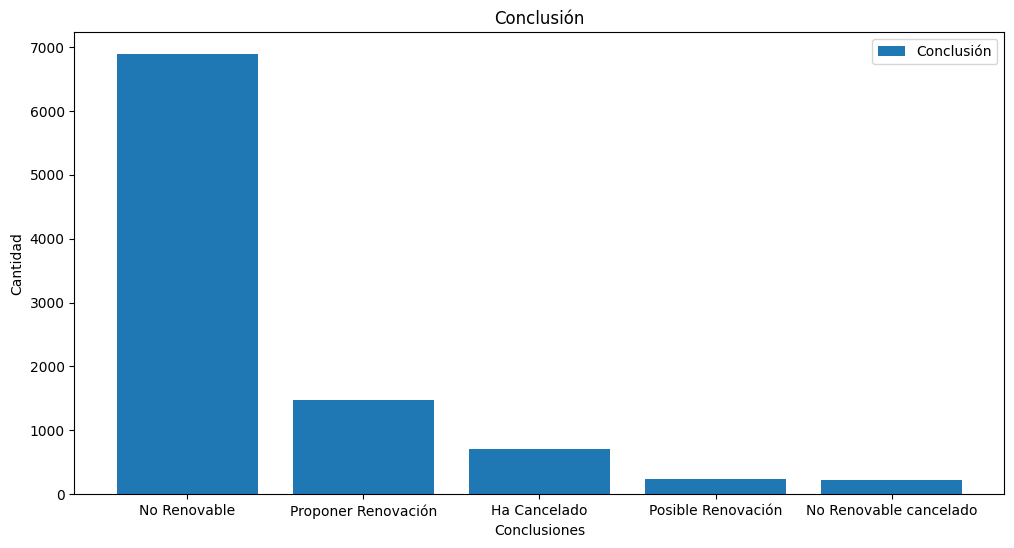

In [21]:
df_renovaciones = df2[["Conclusión"]]

conclusiones = df_renovaciones["Conclusión"].value_counts()
fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(conclusiones.index, conclusiones.values)
plt.xlabel("Conclusiones")
plt.ylabel("Cantidad")
plt.title("Conclusión")
plt.legend(["Conclusión"])


Elegí este gráfico de barras porque me pareció la forma más clara de mostrar la distribución de las conclusiones en mi dataset. Con solo un vistazo, pude ver cuántas veces aparece cada conclusión que indica si un prestamo esta listo para Renovarse. Las barras verticales son fáciles de comparar

### Graficando con matplotlib.pyplot

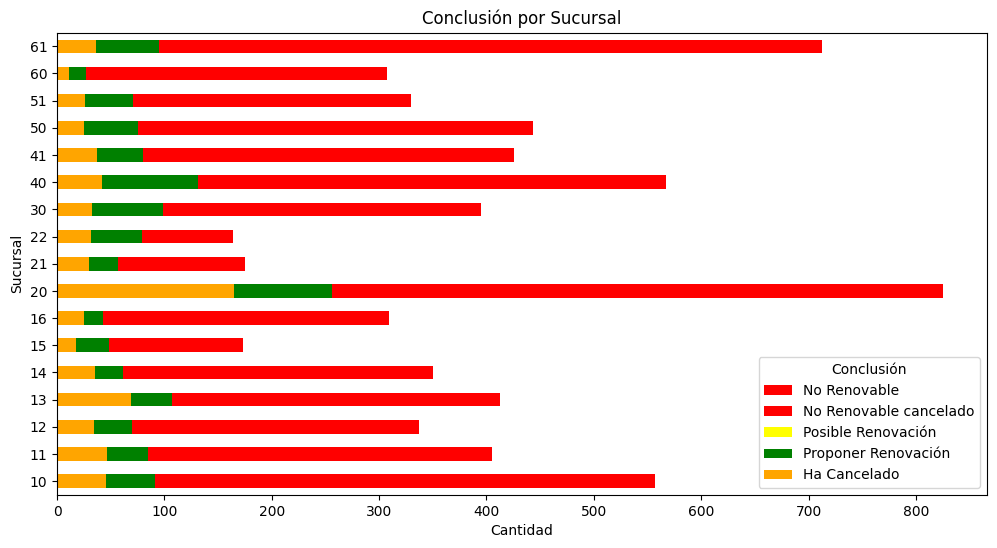

In [22]:
df_renovaciones = df2[["SUCURSAL", "Conclusión"]]
conclusiones_por_sucursal = df_renovaciones.groupby(["SUCURSAL", "Conclusión"]).size().unstack()
fig, ax = plt.subplots(figsize=(12, 6))
conclusiones_por_sucursal["No Renovable"].plot(kind="barh", stacked=True, ax=ax, color='red')
conclusiones_por_sucursal["No Renovable cancelado"].plot(kind="barh", stacked=True, ax=ax, color='red')
conclusiones_por_sucursal["Posible Renovación"].plot(kind="barh", stacked=True, ax=ax, color='yellow')
conclusiones_por_sucursal["Proponer Renovación"].plot(kind="barh", stacked=True, ax=ax, color='green')
conclusiones_por_sucursal["Ha Cancelado"].plot(kind="barh", stacked=True, ax=ax, color='orange')
plt.xlabel("Cantidad")
plt.ylabel("Sucursal")
plt.title("Conclusión por Sucursal")
plt.legend(title="Conclusión")




Utilicé un gráfico de barras apiladas para mostrar la distribución de las conclusiones por sucursal en el conjunto de datos. Este tipo de gráfico permite comparar visualmente las conclusiones más comunes en cada sucursal de manera clara y concisa. Asigné colores diferentes a cada tipo de conclusión para facilitar la identificación. Además, agregué etiquetas y una leyenda para una mejor comprensión del gráfico. En resumen, el gráfico de barras apiladas fue una buena opción  para mostrar la distribución de conclusiones por sucursal.

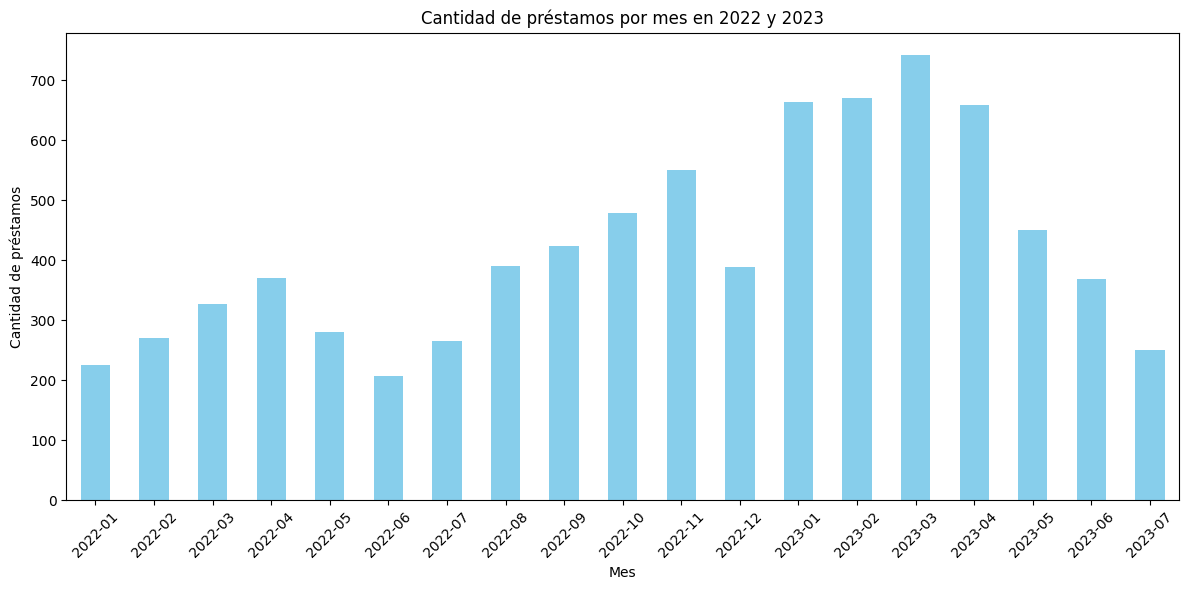

In [23]:
# Filtrar solo los datos del año 2022 y 2023
df_2023 = df2[df2['fec_alt'].dt.year >= 2022]
prestamos_por_mes = df_2023['fec_alt'].dt.to_period('M').value_counts().sort_index()

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
prestamos_por_mes.plot(kind='bar', color='skyblue')
plt.xlabel('Mes')
plt.ylabel('Cantidad de préstamos')
plt.title('Cantidad de préstamos por mes en 2022 y 2023')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Utilicé un gráfico de líneas para mostrar la cantidad de préstamos por mes en los años 2022 y 2023. Este tipo de gráfico permite visualizar la tendencia y los cambios a lo largo del tiempo de manera clara. Ajusté el tamaño de la figura para una mejor presentación y agregué marcadores en forma de puntos para resaltar los valores de cada mes. Además, proporcioné etiquetas para los ejes x e y, así como un título descriptivo. Roté las etiquetas del eje x para una mejor legibilidad. 

### Graficando con SEABORN

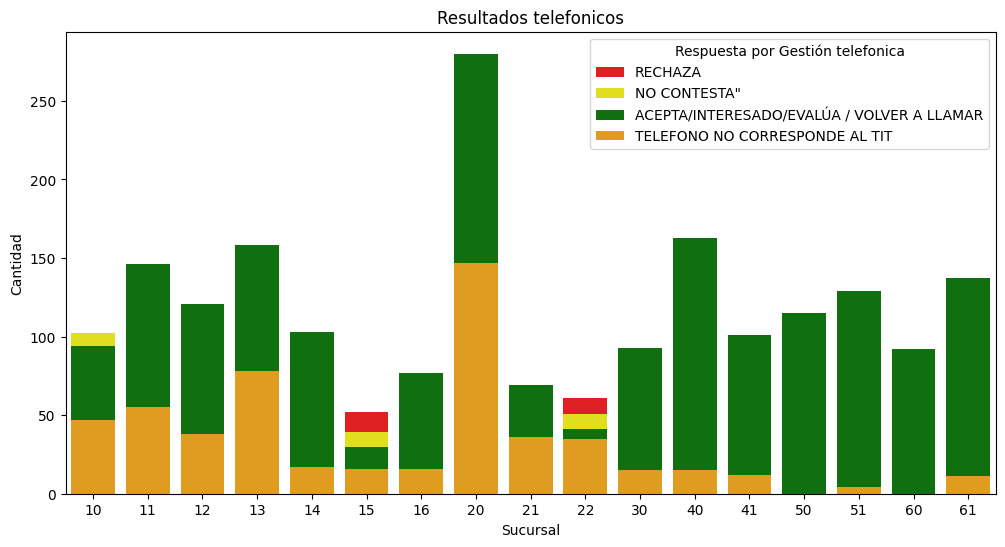

In [24]:
df_renovaciones = df2[["SUCURSAL", "Respuesta"]]

resultados_telefonicos = df_renovaciones.groupby(["SUCURSAL", "Respuesta"]).size().unstack().reset_index()

fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(data=resultados_telefonicos, x="SUCURSAL", y="RECHAZA", color='red', label='RECHAZA')
sns.barplot(data=resultados_telefonicos, x="SUCURSAL", y="NO CONTESTA", color='yellow', label='NO CONTESTA"')
sns.barplot(data=resultados_telefonicos, x="SUCURSAL", y="ACEPTA/INTERESADO/EVALÚA / VOLVER A LLAMAR", color='green', label='ACEPTA/INTERESADO/EVALÚA / VOLVER A LLAMAR')
sns.barplot(data=resultados_telefonicos, x="SUCURSAL", y="TELEFONO NO CORRESPONDE AL TIT", color='orange', label='TELEFONO NO CORRESPONDE AL TIT')

plt.xlabel("Sucursal")
plt.ylabel("Cantidad")
plt.title("Resultados telefonicos")
plt.legend(title="Respuesta por Gestión telefonica")

Utilicé la librería Seaborn para crear un gráfico de barras que muestra la distribución de resultados de gestion telefonica por sucursal en el conjunto de datos. En este caso, utilicé la función barplot() de Seaborn para generar barras de diferentes colores representando cada tipo de conclusión. A través del gráfico de barras, se puede comparar fácilmente la cantidad de cada tipo de conclusión en cada sucursal. La leyenda también se incluyó para ayudar a la interpretación de los colores asociados a cada tipo de conclusión

Text(0.5, 1.0, 'Resultados telefónicos por sucursal')

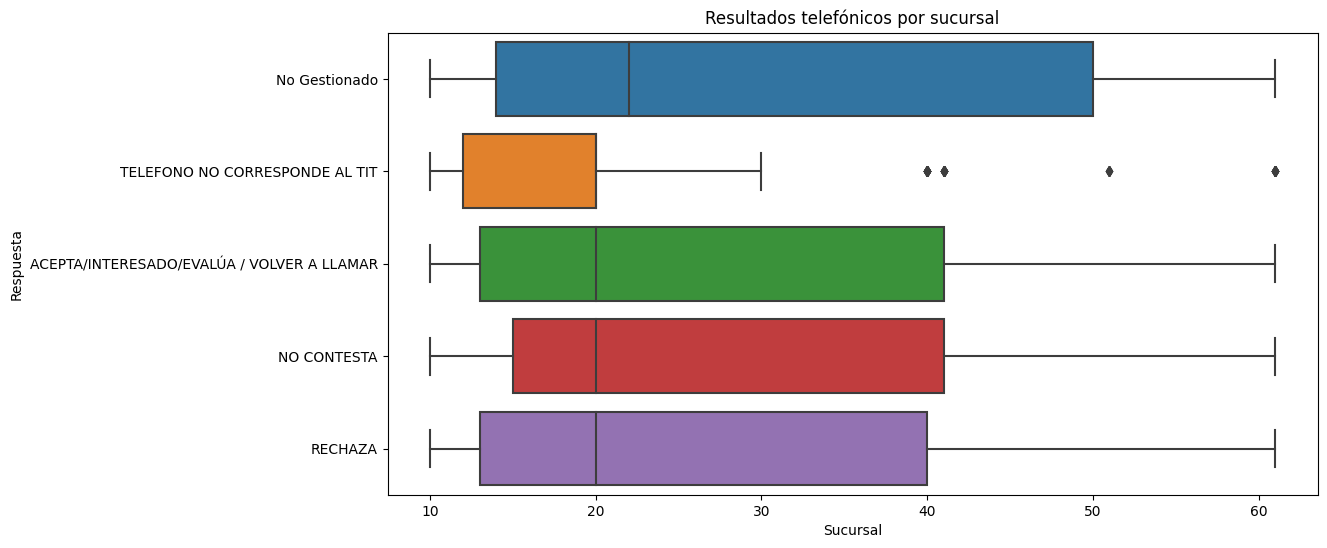

In [25]:
df_renovaciones = df2[["SUCURSAL", "Respuesta"]]
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_renovaciones, x="SUCURSAL", y="Respuesta")
plt.xlabel("Sucursal")
plt.ylabel("Respuesta")
plt.title("Resultados telefónicos por sucursal")

Utilicé un gráfico de caja (box plot) utilizando la biblioteca Seaborn para representar los resultados telefónicos por sucursal. Elegí este gráfico porque permite visualizar la distribución y los valores atípicos de las respuestas en cada sucursal de manera clara y concisa.

El gráfico de caja muestra la mediana, los cuartiles y los valores atípicos de las respuestas en cada sucursal. Permite identificar rápidamente la variabilidad y la tendencia central de los resultados telefónicos en cada sucursal, así como posibles valores atípicos o extremos. Además, al mostrar los resultados para cada sucursal en el mismo gráfico, facilita la comparación entre ellas.

Text(0.5, 1.0, 'Top 10 Vendedores')

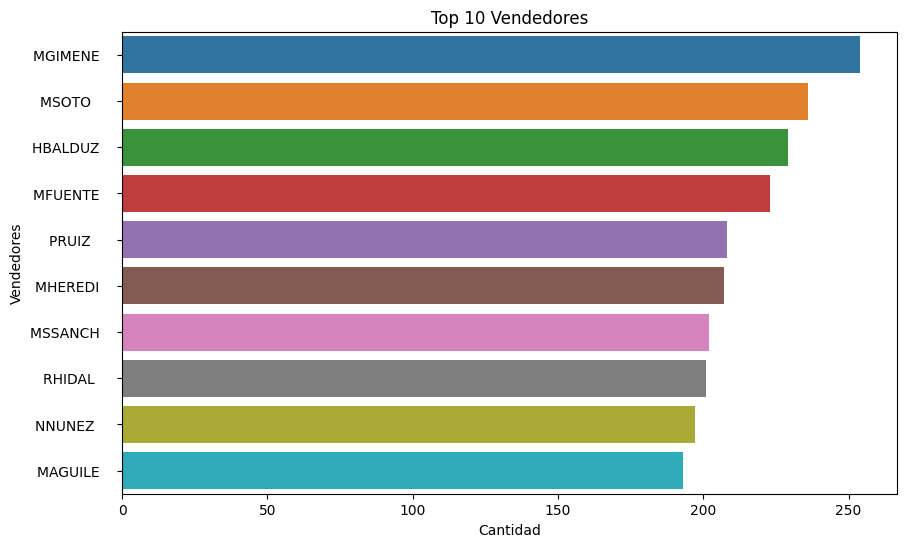

In [26]:
conteo_vendedores = df2['usr_con'].value_counts()
top_10_vendedores = conteo_vendedores.head(10)
valores = top_10_vendedores.values
etiquetas = top_10_vendedores.index
plt.figure(figsize=(10, 6))
sns.barplot(x=valores, y=etiquetas)
plt.xlabel('Cantidad')
plt.ylabel('Vendedores')
plt.title('Top 10 Vendedores')

Utilicé un gráfico de barras en Seaborn para mostrar los 10 vendedores más frecuentes de una manera visualmente fácil de entender. Este tipo de gráfico nos permite comparar la cantidad de ventas de cada vendedor de manera clara y rápida. En el eje horizontal se muestra la cantidad de ventas, mientras que en el eje vertical se muestran los nombres de los vendedores. De esta manera, podemos identificar rápidamente los vendedores más destacados en términos de volumen de ventas.

Text(0.5, 1.0, 'Histograma de préstamos por día en mayo 2023')

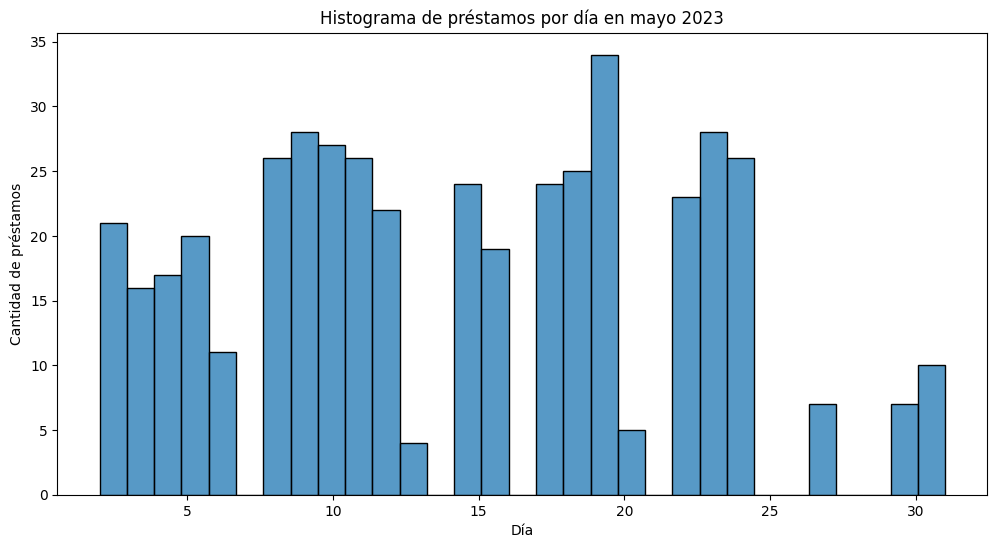

In [27]:
df2['fec_alt'] = pd.to_datetime(df2['fec_alt'])
df_mayo_2023 = df2[(df2['fec_alt'].dt.year == 2023) & (df2['fec_alt'].dt.month == 5)]
dias_mayo_2023 = df_mayo_2023['fec_alt'].dt.day
plt.figure(figsize=(12, 6))
sns.histplot(data=dias_mayo_2023, bins=31, kde=False)
plt.xlabel('Día')
plt.ylabel('Cantidad de préstamos')
plt.title('Histograma de préstamos por día en mayo 2023')

Usé un histograma para ver la cantidad de préstamos por día en mayo de 2023. Básicamente, el histograma muestra cuántos préstamos se hicieron en cada día del mes. Elegí mayo de 2023 porque era el último mes que necesitaba analizar, y quería ver cómo se distribuían los préstamos en ese mes en particular.

Con el histograma, puedo tener una idea rápida de si algunos días tuvieron más préstamos que otros. Si las barras del histograma son altas en ciertos días, significa que hubo más préstamos en esos días. Así puedo detectar patrones o tendencias en la distribución de los préstamos durante el mes.

Text(0.5, 1.0, 'Cantidad de clientes que tienen una oferta de preaprobados')

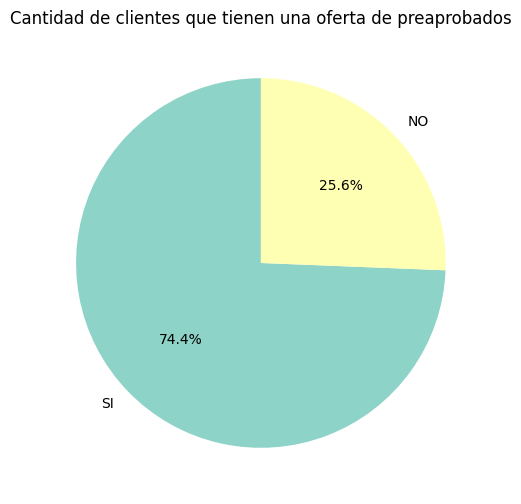

In [28]:
conteo_respuestas = df2['PREAPROBADOS'].value_counts()
valores = conteo_respuestas.values
etiquetas = conteo_respuestas.index
plt.figure(figsize=(6, 6))
sns.set_palette("Set3")
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=90)
plt.title('Cantidad de clientes que tienen una oferta de preaprobados')

Utilicé un gráfico de torta para mostrar la cantidad de clientes de renovación que tienen una oferta de preaprobados y cómo se distribuyen en %.

En el gráfico de torta, cada porción representa un porcentaje del total. La porción más grande corresponde a la respuesta más común y las porciones más pequeñas representan las respuestas menos frecuentes.

# Estructurando un Proyecto de DS

### Introducción

El presente dataset se centra en el análisis de la renovación de préstamos, proporcionando una valiosa fuente de información sobre el comportamiento de los clientes en relación a la continuidad de sus préstamos vigentes. Consta de una muestra de 9500 clientes y abarca una variedad de características relevantes para comprender los factores que influyen en las decisiones de renovación.

El dataset incluye diversas columnas que contienen información detallada sobre cada préstamo. Algunas de estas columnas relevantes son el monto del préstamo original, el monto de la cuota, la sucursal de origen del cliente, el vendedor asociado, la tasa de interés aplicada, la cantidad de cuotas pagadas y la fecha de pago de la última cuota. Además, se registran características adicionales, como la presencia de préstamos cancelados con tasas preferenciales, garantías asociadas y factores relacionados con el historial de pagos.

Este conjunto de datos proporciona una oportunidad única para explorar una serie de preguntas e hipótesis de interés relacionadas con la renovación de préstamos. A través del análisis de esta información detallada, se busca identificar patrones, tendencias y posibles relaciones entre las variables que puedan ayudar a comprender los determinantes de la renovación de préstamos y, en última instancia, brindar información valiosa para la toma de decisiones en el ámbito financiero.

En el siguiente análisis, se aplicarán técnicas de visualización y resúmenes numéricos básicos para explorar los datos y responder a las preguntas planteadas. Se buscará identificar patrones significativos, relaciones entre variables clave y posibles insights que permitan comprender mejor el comportamiento de los clientes y sus decisiones de renovación de préstamos.

Es importante destacar que este dataset se presenta como un recurso valioso para el análisis y la aplicación de metodologías de investigación y data science, brindando una visión más profunda de los factores que influyen en el comportamiento de los clientes en el contexto de los préstamos y la renovación de los mismos.

### Preguntas/Hipotesis

1. ¿Cuál es la tasa de renovación de préstamos en general y por las distintas sucursales?
2. ¿La duración del préstamo (cantidad de cuotas) afecta la tasa de renovación? ¿Los préstamos con montos altos y una mayor cantidad de cuotas tienen tasas de interés más altas y viceversa?
3. ¿Existe una preferencia por plazos de préstamo más cortos, con 12, 18, 24 y 36 cuotas siendo los más populares, lo cual indica una tendencia hacia la búsqueda de mayor flexibilidad y rapidez en la devolución de los préstamos.?
4. ¿Existe una relación entre la sucursal y los montos de préstamo otorgados?
5. ¿Existe una relación entre el monto del préstamo y la propensión al rechazo de ofertas telefónicas?

#### ¿Cuál es la tasa de renovación de préstamos en general y por las distintas sucursales?

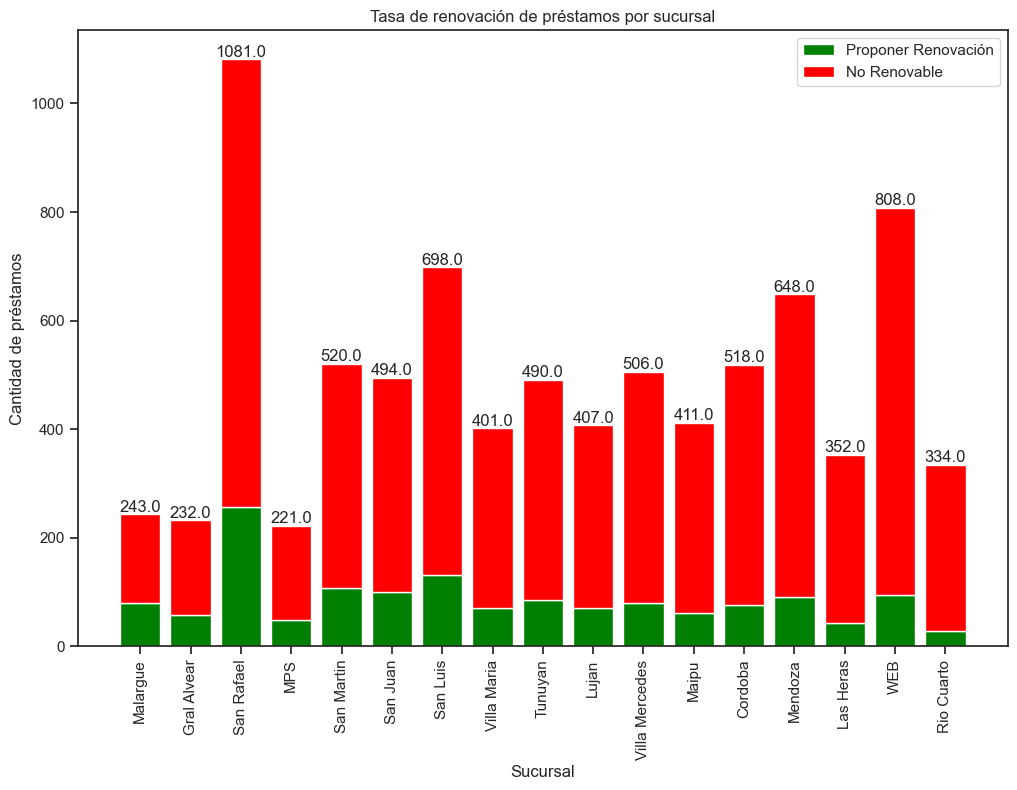

Tasa de renovación total: 15.46%
Tasa de renovación por sucursal:
Conclusión      Proponer Renovación  No Renovable  Tasa de Renovación (%)
Suc                                                                      
Malargue                      79.00        164.00                   32.51
Gral Alvear                   57.00        175.00                   24.57
San Rafael                   256.00        825.00                   23.68
MPS                           48.00        173.00                   21.72
San Martin                   107.00        413.00                   20.58
San Juan                      99.00        395.00                   20.04
San Luis                     131.00        567.00                   18.77
Villa Maria                   71.00        330.00                   17.71
Tunuyan                       85.00        405.00                   17.35
Lujan                         70.00        337.00                   17.20
Villa Mercedes                80.00        426

In [29]:
total_prestamos = len(df2)
prestamos_renovados = df2['Conclusión'].value_counts()['Proponer Renovación']
prestamos_no_renovados = df2['Conclusión'].value_counts()['No Renovable']

tasa_renovacion_total = (prestamos_renovados / total_prestamos) * 100

tasa_renovacion_por_sucursal = df2.groupby('Suc')['Conclusión'].value_counts().unstack().loc[:, ['Proponer Renovación', 'No Renovable']]
tasa_renovacion_por_sucursal['Tasa de Renovación (%)'] = (tasa_renovacion_por_sucursal['Proponer Renovación'] / (tasa_renovacion_por_sucursal['Proponer Renovación'] + tasa_renovacion_por_sucursal['No Renovable'])) * 100

tasa_renovacion_por_sucursal = tasa_renovacion_por_sucursal.sort_values('Tasa de Renovación (%)', ascending=False)

sns.set(style='ticks', palette='Set2')

plt.figure(figsize=(12, 8))

bar_width = 0.8
index = range(len(tasa_renovacion_por_sucursal))

plt.bar(index, tasa_renovacion_por_sucursal['Proponer Renovación'], bar_width, color='green', label='Proponer Renovación')
plt.bar(index, tasa_renovacion_por_sucursal['No Renovable'], bar_width, bottom=tasa_renovacion_por_sucursal['Proponer Renovación'], color='red', label='No Renovable')

for i in index:
    total = tasa_renovacion_por_sucursal['Proponer Renovación'][i] + tasa_renovacion_por_sucursal['No Renovable'][i]
    plt.text(i, total, f'{total}', ha='center', va='bottom')

plt.xlabel('Sucursal')
plt.ylabel('Cantidad de préstamos')
plt.title('Tasa de renovación de préstamos por sucursal')
plt.xticks(index, tasa_renovacion_por_sucursal.index, rotation=90)

plt.legend()
plt.show()

print('Tasa de renovación total: {:.2f}%'.format(tasa_renovacion_total))
print('Tasa de renovación por sucursal:')
print(tasa_renovacion_por_sucursal[['Proponer Renovación', 'No Renovable', 'Tasa de Renovación (%)']])

sucursal_max_renovacion = tasa_renovacion_por_sucursal['Tasa de Renovación (%)'].idxmax()
tasa_max_renovacion = tasa_renovacion_por_sucursal['Tasa de Renovación (%)'].max()

sucursal_min_renovacion = tasa_renovacion_por_sucursal['Tasa de Renovación (%)'].idxmin()
tasa_min_renovacion = tasa_renovacion_por_sucursal['Tasa de Renovación (%)'].min()

print('Sucursal con mayor tasa de renovación: {} ({}%)'.format(sucursal_max_renovacion, tasa_max_renovacion))
print('Sucursal con menor tasa de renovación: {} ({}%)'.format(sucursal_min_renovacion, tasa_min_renovacion))


Tasa de renovación total: La tasa de renovación de préstamos en general es del 15.46%. Esto indica que aproximadamente el 15.46% de los préstamos en el dataset se clasificaron como "Proponer Renovación".

Tasa de renovación por sucursal: Observamos que las tasas de renovación varían entre las distintas sucursales. Algunas sucursales tienen tasas de renovación más altas, como Malargue (32.51%), Gral Alvear (24.57%), y San Rafael (23.68%), mientras que otras tienen tasas más bajas, como Rio Cuarto (8.08%) y WEB (11.76%).

Sucursal con mayor tasa de renovación: La sucursal de Malargue tiene la mayor tasa de renovación con un 32.51%. Esto indica que en esta sucursal, la mayoría de los préstamos se clasificaron como "Proponer Renovación".

Sucursal con menor tasa de renovación: La sucursal de Rio Cuarto tiene la menor tasa de renovación con un 8.08%. Esto implica que en esta sucursal, la proporción de préstamos clasificados como "Proponer Renovación" es menor en comparación con otras sucursales.

#### ¿Los préstamos con montos altos y una mayor cantidad de cuotas tienen tasas de interés más altas y viceversa?


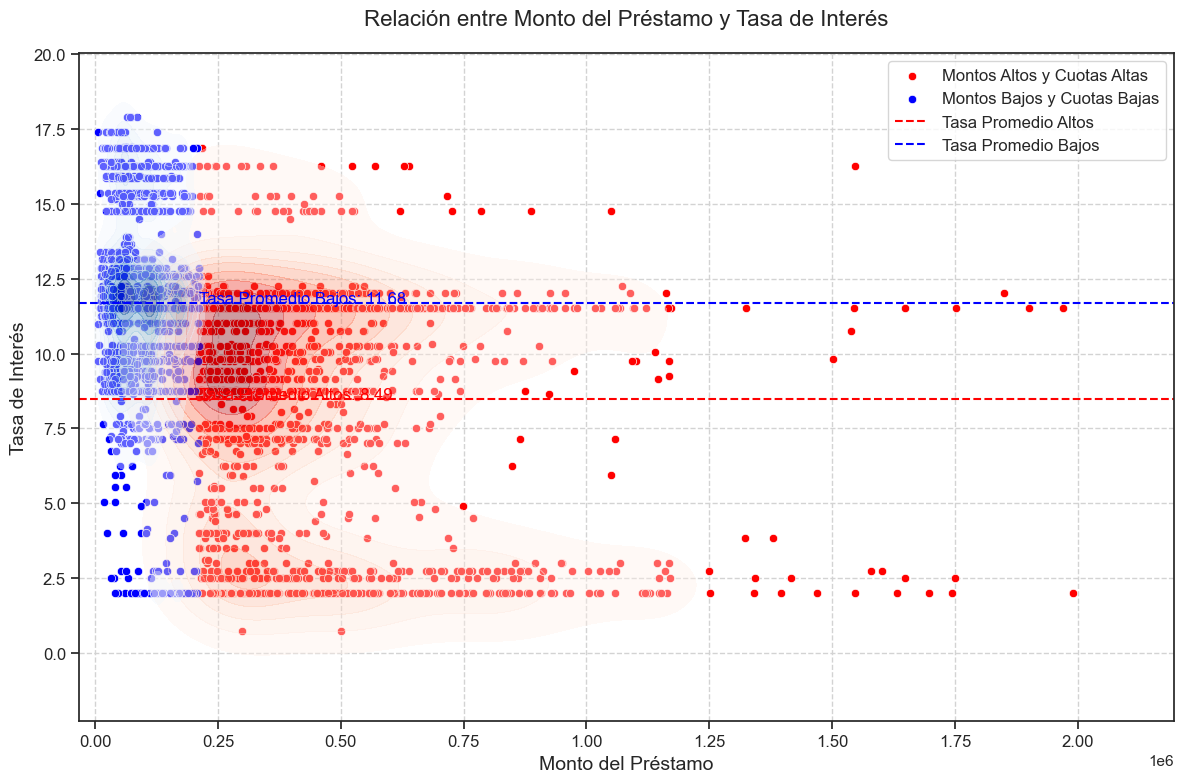

Préstamos con montos altos y cuotas altas:
      mto_pre  ctd_cuo  tas_tem
0      498362       24    11.51
5      335069       24     8.76
7      290354       24     8.76
8      231488       24    11.51
13     533402       36     8.55
...       ...      ...      ...
9501   361341       24    16.26
9504   211693       36     8.76
9520   345032       24    11.51
9530   233052       24     8.76
9533  1501825       24     9.81

[1950 rows x 3 columns]

Préstamos con montos bajos y cuotas bajas:
      mto_pre  ctd_cuo  tas_tem
1      146291       12    15.85
3      119786        6    15.26
4      111532        9    10.25
6      114644        6    11.01
9       70288       12    12.01
...       ...      ...      ...
9521   118461        9    15.26
9522    35802        9    12.15
9531    56353       12     9.75
9534   103095        9     9.75
9538   102254       12    12.65

[2696 rows x 3 columns]

Tasa de interés promedio para préstamos con montos altos y alta cantidad de cuotas: 8.49406153

In [30]:
umbral_monto = df2['mto_pre'].mean()
umbral_cuotas = df2['ctd_cuo'].median()

altos_montos_cuotas = df2[(df2['mto_pre'] > umbral_monto) & (df2['ctd_cuo'] > umbral_cuotas)]
bajos_montos_cuotas = df2[(df2['mto_pre'] < umbral_monto) & (df2['ctd_cuo'] < umbral_cuotas)]

tasa_media_altos = altos_montos_cuotas['tas_tem'].mean()
tasa_media_bajos = bajos_montos_cuotas['tas_tem'].mean()

tabla_altos = altos_montos_cuotas[['mto_pre', 'ctd_cuo', 'tas_tem']]
tabla_bajos = bajos_montos_cuotas[['mto_pre', 'ctd_cuo', 'tas_tem']]

plt.figure(figsize=(12, 8))

sns.scatterplot(data=altos_montos_cuotas, x='mto_pre', y='tas_tem', color='red', label='Montos Altos y Cuotas Altas')

sns.scatterplot(data=bajos_montos_cuotas, x='mto_pre', y='tas_tem', color='blue', label='Montos Bajos y Cuotas Bajas')

plt.xlabel('Monto del Préstamo', fontsize=14)
plt.ylabel('Tasa de Interés', fontsize=14)
plt.title('Relación entre Monto del Préstamo y Tasa de Interés', fontsize=16, pad=20)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.axhline(tasa_media_altos, color='red', linestyle='--', linewidth=1.5, label='Tasa Promedio Altos')
plt.axhline(tasa_media_bajos, color='blue', linestyle='--', linewidth=1.5, label='Tasa Promedio Bajos')
plt.text(umbral_monto + 1000, tasa_media_altos, f'Tasa Promedio Altos: {tasa_media_altos:.2f}', fontsize=12, color='red')
plt.text(umbral_monto + 1000, tasa_media_bajos, f'Tasa Promedio Bajos: {tasa_media_bajos:.2f}', fontsize=12, color='blue')
plt.grid(color='lightgray', linestyle='--')

sns.kdeplot(data=altos_montos_cuotas, x='mto_pre', y='tas_tem', cmap='Reds', fill=True, alpha=0.4)
sns.kdeplot(data=bajos_montos_cuotas, x='mto_pre', y='tas_tem', cmap='Blues', fill=True, alpha=0.4)

plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

print("Préstamos con montos altos y cuotas altas:")
print(tabla_altos)
print()

print("Préstamos con montos bajos y cuotas bajas:")
print(tabla_bajos)
print()

print("Tasa de interés promedio para préstamos con montos altos y alta cantidad de cuotas:", tasa_media_altos)
print("Tasa de interés promedio para préstamos con montos bajos y baja cantidad de cuotas:", tasa_media_bajos)


Empece creando umbrales para poder analizar la información de forma mas clara donde el monto de prestamo introduzco el promedio y la cantidad de cuotas la mediana

Para los préstamos con montos altos y una mayor cantidad de cuotas, se observa una tasa de interés promedio de aproximadamente 9.41%. Esto indica que, en general, estos préstamos tienen tasas de interés más bajas en comparación con los préstamos con montos bajos y cuotas bajas.

Por otro lado, los préstamos con montos bajos y una menor cantidad de cuotas muestran una tasa de interés promedio de alrededor de 11.46%. Esto sugiere que, en promedio, estos préstamos tienen tasas de interés más altas en comparación con los préstamos de montos altos y cuotas altas.

En resumen, podemos afirmar que los resultados respaldan las hipótesis planteadas. Los préstamos con montos altos y una mayor cantidad de cuotas tienden a tener tasas de interés más bajas, mientras que los préstamos con montos bajos y una menor cantidad de cuotas tienden a tener tasas de interés más altas.

#### ¿Existe una preferencia por plazos de préstamo más cortos, con 12, 18, 24 y 36 cuotas siendo los más populares, lo cual indica una tendencia hacia la búsqueda de mayor flexibilidad y rapidez en la devolución de los préstamos.?

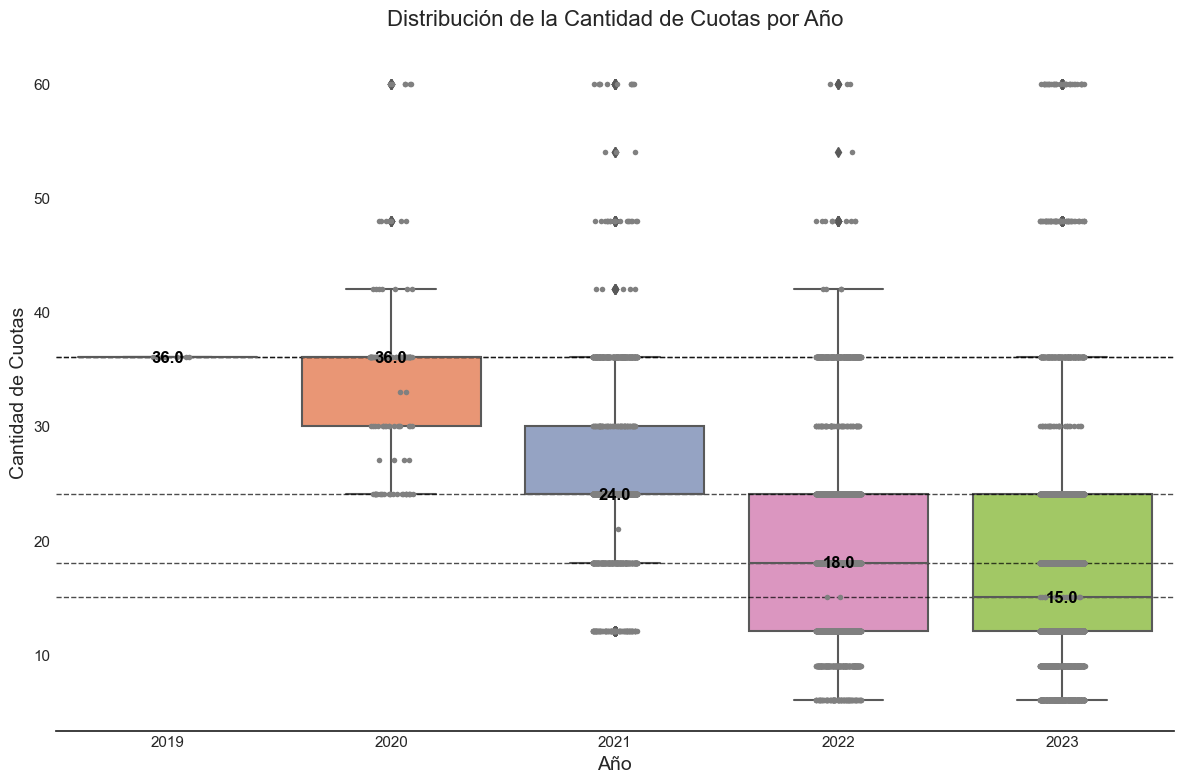

   fec_alt_year    6    9    12  15    18  21    24  27  30  33   36  42  48  \
0          2019    0    0     0   0     0   0     0   0   0   0    7   0   0   
1          2020    0    0     0   0     0   0    25   4  17   2   76   7   7   
2          2021    0    0    90   0   206   1   725   0  65   0  279   5  19   
3          2022   87  211   973   2  1268   0  1238   0  60   0  324   4   9   
4          2023  357  354  1179  13   950   0   625   0  29   0  204   0  57   

   54  60  Moda  
0   0   0    36  
1   0   6    36  
2   3  11    24  
3   1   3    18  
4   0  37    12  


In [31]:
df2['fec_alt_year'] = df2['fec_alt'].dt.year
df_filtered = df2[df2['fec_alt_year'] >= 2019]

sns.set(style='ticks', palette='Set2')

fig, ax = plt.subplots(figsize=(12, 8))

sns.boxplot(data=df_filtered, x='fec_alt_year', y='ctd_cuo', ax=ax, linewidth=1.5)

sns.stripplot(data=df_filtered, x='fec_alt_year', y='ctd_cuo', color='gray', size=4, ax=ax)

ax.set_xlabel('Año', fontsize=14)
ax.set_ylabel('Cantidad de Cuotas', fontsize=14)
ax.set_title('Distribución de la Cantidad de Cuotas por Año', fontsize=16, pad=20)

ax.tick_params(axis='both', which='both', length=0)

sns.despine(left=True, right=True)

medians = df_filtered.groupby('fec_alt_year')['ctd_cuo'].median().values
for i, median in enumerate(medians):
    ax.axhline(median, color='black', linestyle='--', alpha=0.7, linewidth=1)

for i, median in enumerate(medians):
    ax.text(i, median, f'{median}', va='center', ha='center', fontweight='bold', color='black')

plt.tight_layout()
plt.show()

moda_cuotas_por_año = df2.groupby('fec_alt_year')['ctd_cuo'].agg(lambda x: x.value_counts().index[0]).reset_index()
moda_cuotas_por_año = moda_cuotas_por_año.rename(columns={'ctd_cuo': 'Moda'})

prestamos_por_cuota = df2.groupby(['fec_alt_year', 'ctd_cuo']).size().reset_index(name='Cantidad')

tabla_prestamos = prestamos_por_cuota.pivot_table(index='fec_alt_year', columns='ctd_cuo', values='Cantidad', fill_value=0)

moda_cuotas_por_año = df2.groupby('fec_alt_year')['ctd_cuo'].agg(lambda x: x.value_counts().index[0]).reset_index()
moda_cuotas_por_año = moda_cuotas_por_año.rename(columns={'ctd_cuo': 'Moda'})

tabla_prestamos = tabla_prestamos.merge(moda_cuotas_por_año, on='fec_alt_year')

print(tabla_prestamos)


En el año 2020, hubo una notable disminución en la cantidad de préstamos otorgados, especialmente en plazos más largos. Se atribuye esta disminución a la pandemia y las restricciones económicas que afectaron la demanda de préstamos. La moda de los plazos para este año fue de 36 cuotas, lo que indica que la mayoría de los préstamos se otorgaron con ese plazo.

En el año 2021, la cantidad de préstamos aumentó en comparación con el año anterior. Los plazos más comunes fueron 12, 18, 24 y 36 cuotas, siendo este último el más frecuente (moda) para ese año.

En el año 2022, la tendencia de aumento en la cantidad de préstamos se mantuvo en comparación con años anteriores. Los plazos más frecuentes fueron nuevamente 12, 18, 24 y 36 cuotas, siendo 36 cuotas nuevamente la moda para este año.

En el año 2023, se observa una tendencia similar a los años anteriores en cuanto a los plazos más comunes, con 12, 18, 24 y 36 cuotas destacándose. La moda de los plazos fue de 12 cuotas.

En general, podemos concluir que los plazos más populares para los préstamos son 12, 18, 24 y 36 cuotas, y que la elección de la cuota más frecuente varía de un año a otro. También se destaca el impacto de la pandemia en el año 2020, reflejado en una menor cantidad de préstamos en general. Estos datos proporcionan información valiosa sobre el comportamiento de los clientes en relación a los plazos de préstamo y pueden ser útiles para tomar decisiones estratégicas en el futuro.

#### ¿Existe una relación entre la sucursal y los montos de préstamo otorgados?

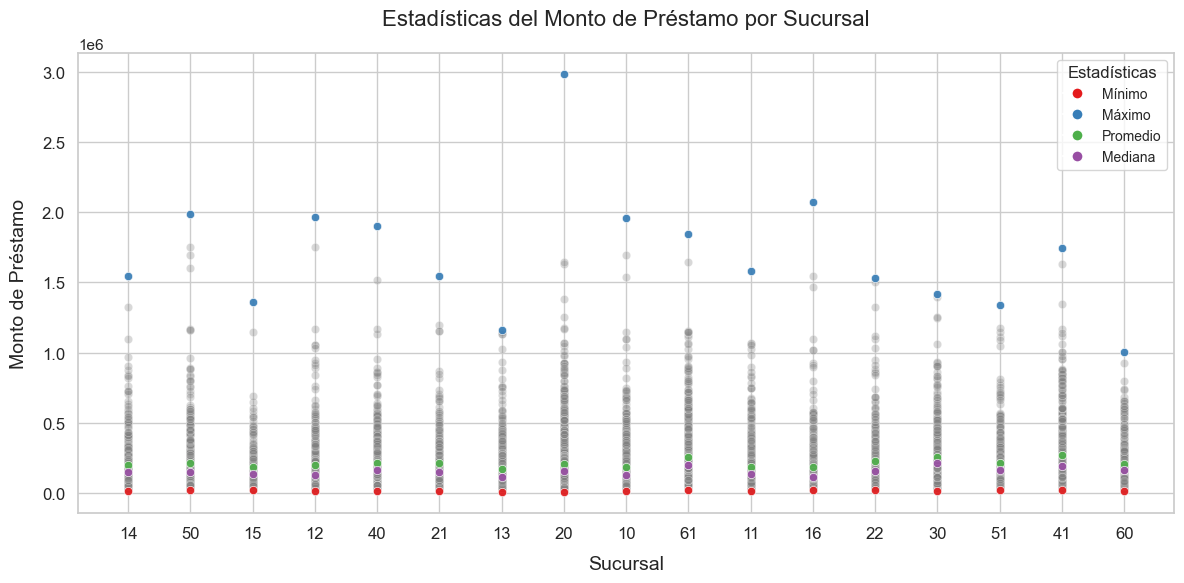

   Sucursal  Mínimo   Máximo   Promedio    Mediana
0        10   12178  1958797 186,292.21 128,289.50
1        11   10528  1578656 186,698.10 131,332.00
2        12   10580  1970146 195,493.20 130,007.00
3        13    5348  1163741 169,993.77 114,839.50
4        14   13957  1547755 194,860.06 150,078.00
5        15   22422  1360177 181,062.73 132,667.00
6        16   17177  2075888 186,341.77 113,620.00
7        20    5367  2988453 205,829.81 156,729.00
8        21   12220  1544081 214,258.76 148,516.00
9        22   21499  1533337 229,988.27 151,974.00
10       30   14985  1416778 256,454.87 213,160.00
11       40   10861  1900425 209,089.24 164,838.00
12       41   18377  1743271 267,472.14 189,003.00
13       50   16367  1989724 215,147.35 149,158.00
14       51   19723  1341343 212,459.19 159,354.00
15       60   11254  1004941 203,426.71 162,412.00
16       61   17496  1849158 254,777.55 196,885.50


In [32]:
df2['SUCURSAL'] = df2['SUCURSAL'].astype(str)
sns.set(style='whitegrid', palette='Set3')

colores_estadisticas = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3']

stats_por_sucursal = df2.groupby('SUCURSAL')['mto_pre'].agg(['min', 'max', 'mean', 'median']).reset_index()

plt.figure(figsize=(12, 6))

plt.xlabel('Sucursal', fontsize=14, labelpad=10)
plt.ylabel('Monto de Préstamo', fontsize=14, labelpad=10)
plt.title('Estadísticas del Monto de Préstamo por Sucursal', fontsize=16, pad=20)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

sns.scatterplot(data=df2, x='SUCURSAL', y='mto_pre', color='grey', alpha=0.3)

sns.scatterplot(data=stats_por_sucursal, x='SUCURSAL', y='min', color=colores_estadisticas[0], alpha=0.9, label='Mínimo')
sns.scatterplot(data=stats_por_sucursal, x='SUCURSAL', y='max', color=colores_estadisticas[1], alpha=0.9, label='Máximo')
sns.scatterplot(data=stats_por_sucursal, x='SUCURSAL', y='mean', color=colores_estadisticas[2], alpha=0.9, label='Promedio')
sns.scatterplot(data=stats_por_sucursal, x='SUCURSAL', y='median', color=colores_estadisticas[3], alpha=0.9, label='Mediana')

leyenda = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8) for color in colores_estadisticas]
leyenda_texto = ['Mínimo', 'Máximo', 'Promedio', 'Mediana']
plt.legend(leyenda, leyenda_texto, title='Estadísticas', loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

tabla_estadisticas = pd.DataFrame({
    'Sucursal': stats_por_sucursal['SUCURSAL'],
    'Mínimo': stats_por_sucursal['min'],
    'Máximo': stats_por_sucursal['max'],
    'Promedio': stats_por_sucursal['mean'],
    'Mediana': stats_por_sucursal['median']
})

print(tabla_estadisticas)



Rango de montos de préstamos: Se observa una variación significativa en los montos de préstamos otorgados entre las distintas sucursales. Por ejemplo, la sucursal Mendoza (10) tiene un monto mínimo de $12,178 y un máximo de $1,958,797, mientras que la sucursal Las Heras (16) tiene un monto mínimo de $20,454 y un máximo de $2,075,888. Esto indica que existen diferencias notables en los montos de préstamos que se conceden en cada sucursal.

Promedio y mediana: Los promedios y medianas de los montos de préstamos también varían entre las sucursales. Por ejemplo, la sucursal Mendoza (10) tiene un promedio de $186,292.21 y una mediana de $128,289.50, mientras que la sucursal Las Heras (16) tiene un promedio de $186,341.77 y una mediana de $113,620.00. Estos valores proporcionan una idea de la distribución de los montos de préstamos y la presencia de posibles valores atípicos en cada sucursal.

Comparación entre promedio y mediana: En algunas sucursales, como Mendoza (10) y Tunuyan (11), el promedio es ligeramente mayor que la mediana, lo que sugiere la presencia de algunos valores atípicos o préstamos de montos más altos. Por otro lado, en sucursales como Lujan (12) y San Martin (13), la mediana es cercana al promedio, indicando una distribución más simétrica de los montos de préstamos.

Sucursal Las Heras (16): La sucursal Las Heras (16) destaca por tener el monto máximo de préstamo más alto de todas las sucursales, alcanzando los $2,075,888. Este valor podría considerarse un valor atípico en comparación con el resto de los datos.

En resumen, se observan diferencias notables en los montos de préstamos otorgados en cada sucursal. Los promedios y medianas de los montos varían entre sucursales, lo que puede indicar diferentes patrones de préstamos en cada ubicación. Además, la sucursal Las Heras destaca por tener el monto máximo de préstamo más alto, lo que podría requerir un análisis adicional para entender la razón detrás de este valor atípico. Estos datos proporcionan información relevante para la toma de decisiones estratégicas y comprender el comportamiento de los clientes en relación a los montos de préstamo en cada sucursal.

#### ¿Existe una relación entre el monto del préstamo y la propensión al rechazo de ofertas telefónicas?

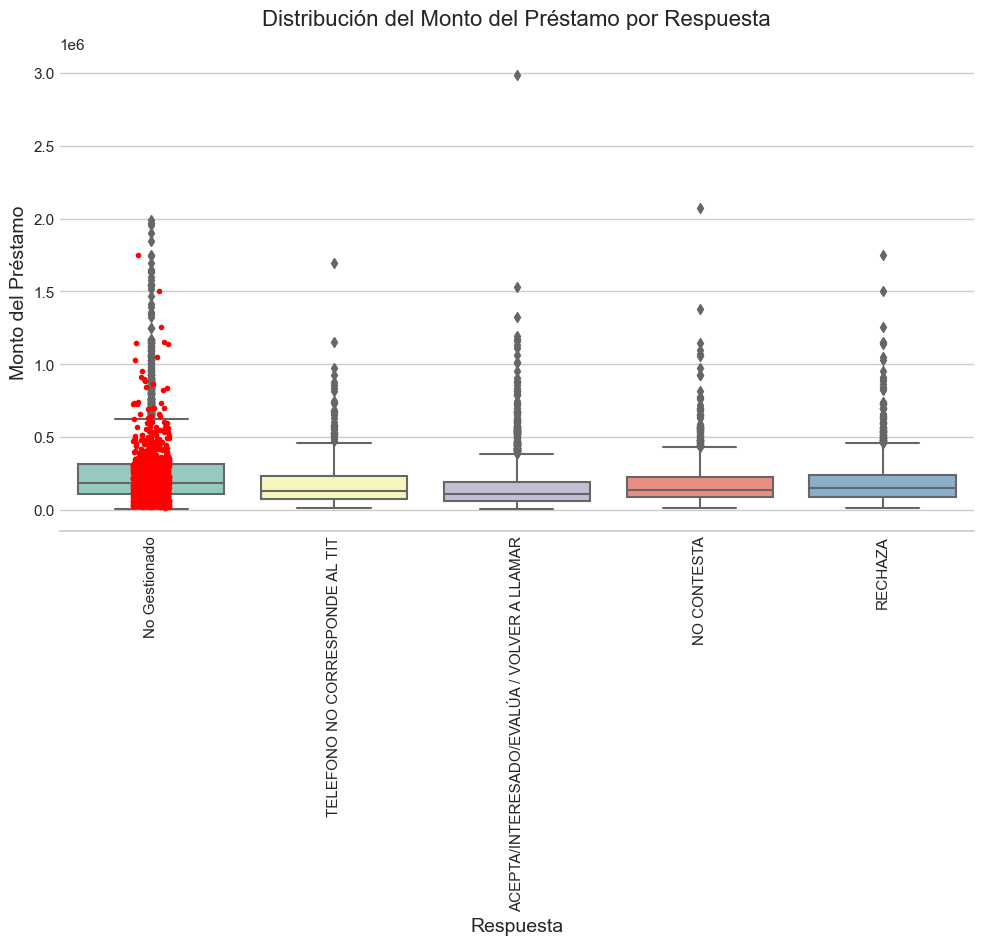

Respuesta,ACEPTA,NO CONTESTA,No Gestionado,RECHAZA,NO CORRESPONDE
Rango de Monto,,,,,
"(0, 10000]",3,0,2,0,1
"(10000, 20000]",24,2,17,2,3
"(20000, 30000]",68,20,40,25,11
"(30000, 40000]",95,42,71,40,19
"(40000, 50000]",96,37,80,43,9
"(50000, 60000]",170,90,168,84,50
"(60000, 70000]",109,54,148,60,28
"(70000, 80000]",102,46,117,40,26
"(80000, 90000]",87,62,130,58,14


In [33]:
prestamos_rechazados = df2[df2['Respuesta'] == 'RECHAZA']
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(data=df2, x='Respuesta', y='mto_pre', ax=ax)
sns.stripplot(data=prestamos_rechazados, x='Respuesta', y='mto_pre', color='red', marker='o', size=4, ax=ax)

ax.set_xlabel('Respuesta', fontsize=14)
ax.set_ylabel('Monto del Préstamo', fontsize=14)
ax.set_title('Distribución del Monto del Préstamo por Respuesta', fontsize=16, pad=20)

ax.tick_params(axis='both', which='both', length=0)
sns.despine(left=True, right=True)
plt.tight_layout()

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

df2['Rango de Monto'] = pd.cut(df2['mto_pre'], bins=np.arange(0, df2['mto_pre'].max()+10000, 10000))
tabla_respuestas = pd.crosstab(df2['Rango de Monto'], df2['Respuesta'])
tabla_respuestas.columns = tabla_respuestas.columns.str.replace('ACEPTA/INTERESADO/EVALÚA / VOLVER A LLAMAR', 'ACEPTA')
tabla_respuestas.columns = tabla_respuestas.columns.str.replace('TELEFONO NO CORRESPONDE AL TIT', 'NO CORRESPONDE')
tabla_respuestas = pd.DataFrame(tabla_respuestas)
tabla_respuestas.head(20)


Los préstamos con montos menores a 50,000 tienden a tener una mayor propensión a ser rechazados en comparación con otras respuestas telefónicas. Específicamente, en los rangos de monto de (0, 10,000], (10,000, 20,000], (20,000, 30,000], y (30,000, 40,000], se observa que la cantidad de préstamos rechazados es notablemente mayor en comparación con las otras respuestas.

Es esencial tener en cuenta que la propensión al rechazo puede verse influenciada por diversos factores, como el perfil crediticio de los solicitantes y su capacidad de pago, entre otros. Por lo tanto, sería recomendable realizar un análisis más detallado para comprender mejor los factores que contribuyen a esta tendencia de rechazo en los préstamos con montos inferiores a 50,000. Esto permitiría tomar decisiones más informadas y diseñar estrategias para mejorar la aprobación de préstamos en esos rangos de monto específicos.

-----------------------------------------------------------

# Estructurando un Proyecto de DS II

#### Título: <u>Análisis de Renovación de Préstamos: Comportamiento de los Clientes y Factores Influyentes</u>

##### <font color="darkred">Abstracto:</font>
Este estudio se centra en el análisis de la **renovación de préstamos** y tiene como objetivo comprender los factores que influyen en las decisiones de **renovación de los clientes**. El dataset utilizado consta de una muestra de 9500 clientes y proporciona una **valiosa fuente de información** sobre el comportamiento de los clientes en relación a la continuidad de sus préstamos vigentes.

El conjunto de datos incluye una variedad de características relevantes, como el **monto del préstamo original**, el **monto de la cuota**, la **sucursal de origen del cliente**, el **vendedor asociado**, la **tasa de interés aplicada**, la **cantidad de cuotas pagadas** y la **fecha de pago de la última cuota**. Además, se registran características adicionales, como la presencia de **préstamos cancelados con tasas preferenciales**, **garantías asociadas** y factores relacionados con el **historial de pagos**.

En este estudio, se aplicarán técnicas de **visualización** y **resúmenes numéricos básicos** para explorar los datos y responder a preguntas e hipótesis de interés relacionadas con la renovación de préstamos. El objetivo es identificar patrones, tendencias y posibles relaciones entre las variables que puedan ayudar a comprender los determinantes de la renovación de préstamos y proporcionar **información valiosa** para la toma de decisiones en el ámbito financiero.



##### <font color="darkred">Audiencia</font>
La audiencia principal de este estudio son los **profesionales** y **analistas financieros** interesados en comprender el comportamiento de los clientes en relación a la **renovación de préstamos**. Además, los **investigadores** y **científicos de datos** también pueden encontrar este conjunto de datos como un recurso valioso para aplicar metodologías de investigación y data science, obteniendo una visión más profunda de los factores que influyen en el comportamiento de los clientes en el contexto de los préstamos y su renovación.

En resumen, este estudio proporciona una visión detallada sobre la **renovación de préstamos**, permitiendo el análisis de patrones, tendencias y relaciones entre variables clave. La información obtenida puede ser de gran utilidad para comprender el comportamiento de los clientes y tomar decisiones informadas en el ámbito financiero.



##### <font color="darkred">Preguntas/Hipótesis que queremos resolver mediante el análisis de datos:</font>

1. ¿Cuál es la tasa de renovación de préstamos en general y por cada una de las sucursales específicas?
2. ¿Cómo afecta la duración del préstamo (cantidad de cuotas) a la tasa de renovación? ¿Los préstamos con montos altos y una mayor cantidad de cuotas tienden a tener tasas de interés más altas y viceversa?
3. ¿Existe una preferencia por plazos de préstamo más cortos, como 12, 18, 24 y 36 cuotas, indicando una tendencia hacia la búsqueda de menor tasa o buscan rapidez en la devolución de los préstamos?
4. ¿Hay alguna relación entre la sucursal y los montos de préstamo otorgados? ¿Algunas sucursales tienen una mayor propensión a otorgar préstamos más altos que otras?
5. ¿Existe alguna relación entre el monto del préstamo y la propensión al rechazo de ofertas telefónicas? ¿Los préstamos con montos más altos están asociados con una mayor probabilidad de rechazo de las ofertas telefónicas?
6. ¿Cómo influyen los factores demográficos, como la edad, el sexo y la provincia, en las decisiones de renovación de préstamos? ¿Existen diferencias significativas en las tasas de renovación entre diferentes grupos de edad, género y ubicación geográfica?



##### <font color="darkred">Análisis Exploratorio de Datos (EDA):</font>
En esta sección, nos adentraremos en el **análisis exploratorio de los datos** para obtener una comprensión más profunda del conjunto de datos de **renovación de préstamos**. El objetivo es explorar las características de los datos, identificar patrones y tendencias, y obtener información relevante que nos ayude a responder a las preguntas y suposiciones que tenemos.

A continuación, describiremos algunas de las actividades que llevaremos a cabo durante el **análisis exploratorio de datos**:

**Análisis descriptivo**: Calcularemos estadísticas resumidas, como valores promedio y rangos, para comprender mejor las variables numéricas. También examinaremos las distribuciones de las variables y buscaremos valores que sean inusuales o diferentes al resto.

**Visualización de datos**: Utilizaremos gráficos e imágenes para explorar las relaciones entre diferentes variables y buscar patrones visuales. Esto nos ayudará a identificar posibles conexiones y tendencias en los datos.

**Análisis comparativo**: Realizaremos comparaciones entre diferentes grupos o categorías para entender las diferencias en las tasas de renovación y otros aspectos relevantes.

**Análisis de correlación**: Investigaremos las relaciones y conexiones entre variables para determinar posibles factores que influyen en las decisiones de renovación de préstamos.

**Segmentación de clientes**: Dividiremos los datos en grupos más pequeños con características similares, lo que nos permitirá analizar los comportamientos y patrones específicos de cada grupo.

A través del **análisis exploratorio de datos**, buscamos obtener información valiosa y generar ideas preliminares que nos ayuden a avanzar en nuestro estudio de la renovación de préstamos. Estos hallazgos servirán como base para el siguiente paso del análisis y la toma de decisiones en el ámbito financiero.



##### <font color="darkred">Recomendaciones basados en los insights observados:</font>
1. **Tasa de renovación total y por sucursal**:
   - Identificar las *razones detrás de las bajas tasas de renovación* en sucursales como *Rio Cuarto* y *WEB*, considerando factores demográficos como **edad, sexo y provincia**. Esto permitiría ajustar las estrategias de renovación y adaptarlas a las características de los clientes en esas áreas específicas.
   - Analizar las *prácticas exitosas* en sucursales con altas tasas de renovación, como *Gral Alvear, Villa Maria, Malargue, San Luis, San Martin, San Rafael* y *Tunuyan*, y replicar esas estrategias en otras sucursales para mejorar la tasa de renovación en general.

2. **Monto de préstamos y tasas de interés**:
   - Fomentar préstamos con *montos más altos y plazos más largos* ofreciendo incentivos atractivos, como **tasas de interés más bajas**. Considerar cómo factores demográficos, como la *edad*, pueden influir en la preferencia por préstamos de diferentes montos y plazos.
   - Evaluar las *tasas de interés de los préstamos con montos más bajos y plazos más cortos* para garantizar que sean competitivas y atractivas, especialmente para grupos demográficos específicos, como los **jóvenes**.

3. **Plazos de préstamo**:
   - Enfocar la estrategia de renovación en los plazos más populares (12, 18, 24 y 36 cuotas) y diseñar ofertas flexibles y atractivas para estos períodos. Considerar cómo factores demográficos, como la *edad* y la *provincia*, pueden influir en las preferencias de plazo.
   - Analizar las tendencias de plazos de préstamo durante la pandemia y considerar estrategias adaptadas a los cambios económicos y a las preferencias de los clientes en diferentes años y provincias.

4. **Montos de préstamos por sucursal**:
   - Evaluar los rangos de montos de préstamos por sucursal, considerando factores demográficos como la *provincia* y el *sexo*, para adaptar las ofertas de préstamos a las necesidades y preferencias específicas de los clientes en cada área geográfica.
   - Segmentar la oferta de préstamos y diseñar productos financieros personalizados para satisfacer las necesidades de diferentes grupos demográficos, como *jóvenes, mujeres* y personas en áreas específicas.

5. **Propensión al rechazo de ofertas telefónicas**:
   - Realizar un análisis más profundo considerando factores demográficos, como la *edad* y el *sexo*, para comprender mejor las causas del rechazo de ofertas telefónicas en préstamos con montos menores a 50,000. Esto permitirá identificar barreras específicas y ajustar las estrategias de contacto y negociación con esos grupos demográficos.


### Objetivo:
El objetivo de este proyecto es analizar el comportamiento de los clientes en relación a la renovación de préstamos y comprender los factores que influyen en sus decisiones. Para lograrlo, emplearemos análisis exploratorio de datos y técnicas predictivas utilizando herramientas de programación en Python.

Utilizando un conjunto de datos de préstamos vigentes, nos enfocaremos en identificar patrones, tendencias y posibles relaciones entre variables clave con el fin de entender los determinantes de la renovación de préstamos. Además, utilizaremos técnicas de segmentación de clientes basadas en características demográficas como la edad, el sexo, la provincia, entre otros.

Para obtener insights más profundos y respaldar la toma de decisiones en el ámbito financiero, aplicaremos técnicas de análisis predictivos. Utilizaremos algoritmos de aprendizaje automático y modelos estadísticos para predecir la probabilidad de renovación de préstamos para diferentes segmentos de clientes. Estos análisis predictivos nos permitirán comprender mejor los factores que influyen en las decisiones de renovación y brindar recomendaciones específicas para mejorar la tasa de renovación.

Aprovecharemos las capacidades de programación en Python para llevar a cabo el análisis de datos y construir modelos predictivos. Utilizaremos bibliotecas especializadas como pandas, matplotlib/Seaborn y scikit-learn para manipular y analizar los datos, así como para implementar algoritmos de aprendizaje automático. Estas herramientas nos permitirán extraer información valiosa de los datos y generar modelos predictivos precisos y confiables.

### Contexto Comercial:
Este proyecto se desarrolla en el contexto de una institución financiera dedicada a ofrecer préstamos a sus clientes. Nuestro objetivo principal es brindar soluciones financieras que satisfagan las necesidades de nuestros clientes y promuevan su bienestar económico. La renovación de préstamos desempeña un papel fundamental en nuestro negocio, ya que nos permite mantener relaciones a largo plazo con nuestros clientes y maximizar el valor que podemos ofrecerles.

En un entorno altamente competitivo, la retención de clientes es un desafío constante. Comprender en profundidad el comportamiento de los clientes en relación a la renovación de préstamos nos proporciona una ventaja estratégica al permitirnos adaptar nuestras estrategias de retención a las preferencias y necesidades específicas de cada cliente. Al enfocarnos en la mejora de la tasa de renovación de préstamos, podemos fortalecer nuestra relación con los clientes existentes, aumentar la lealtad a la marca y generar flujos de ingresos estables a largo plazo.

### Problema Comercial:
El problema comercial que abordamos es la necesidad de aumentar la tasa de renovación de préstamos. Actualmente, la tasa de renovación es del 35.18%, lo cual indica que hay margen para mejorar. Para lograrlo, es fundamental comprender los factores que influyen en las decisiones de renovación de los clientes y diseñar estrategias efectivas de retención. Esto implica identificar segmentos de clientes con mayor propensión a renovar préstamos, comprender sus preferencias y necesidades, y ofrecer incentivos adecuados para promover la renovación.

### Contexto Analítico:
En términos analíticos, nos basamos en un conjunto de datos de préstamos vigentes que proporciona información detallada sobre el comportamiento de los clientes y las características de los préstamos. Estos datos constituyen una valiosa fuente de información que nos permite realizar un análisis exploratorio en profundidad y obtener insights relevantes.

Para alcanzar nuestros objetivos, aplicamos técnicas de análisis exploratorio de datos (EDA). Estas técnicas nos permiten calcular estadísticas descriptivas, como valores promedio, desviaciones estándar y rangos, para comprender mejor las características numéricas de los préstamos. Además, utilizamos visualizaciones gráficas, como histogramas, gráficos de dispersión y diagramas de caja, para explorar las distribuciones y las relaciones entre variables.

Además del análisis descriptivo, empleamos técnicas de correlación y regresión para identificar posibles relaciones entre variables y determinar qué factores tienen un mayor impacto en la renovación de préstamos. Esta comprensión nos permite generar recomendaciones fundamentadas que respaldan la toma de decisiones estratégicas.

En resumen, nuestro enfoque analítico nos permite aprovechar al máximo los datos disponibles y generar insights accionables que nos ayuden a abordar el problema de la baja tasa de renovación de préstamos de manera efectiva.

# Estructurando un proyecto de DS-parte III

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [35]:
# Lo primero que hice fue crear una copia del DataFrame df2 para asegurarme de no romper  datos originales
nuevo_df = df2.copy()

# A continuación, realicé un mapeo manual de las categorías de las columnas Conclusion y Respuesta
# a valores numéricos utilizando diccionarios.
mapeo_conclusion = {
    'No Renovable': 4,
    'Proponer Renovación': 1,
    'Posible Renovación': 2,
    'No Renovable cancelado': 5,
    'Ha Cancelado': 3
}

mapeo_respuesta = {
    'Nuevo': 5,
    'TELEFONO NO CORRESPONDE AL TIT': 2,
    'RECHAZA': 4,
    'NO CONTESTA': 3,
    'ACEPTA/INTERESADO/EVALÚA / VOLVER A LLAMAR': 1
}

# Luego, reemplacé las categorías con sus valores numéricos correspondientes en las columnas conclusión y Respuesta
nuevo_df['Conclusión'] = nuevo_df['Conclusión'].replace(mapeo_conclusion)
nuevo_df['Respuesta'] = nuevo_df['Respuesta'].replace(mapeo_respuesta)

nuevo_df['conclusionvalor'] = nuevo_df['Conclusión']
nuevo_df['respuestavalor'] = nuevo_df['Respuesta']

# seleccioné las columnas deseadas para crear un nuevo DataFrame llamado df_valor
columnas_valor = ['mto_pre', 'ctd_cuo', 'tas_tem', 'CENDEU', 'imp_cuo', 'SUCURSAL', 'dia_atr', 'porcentajeRen', 'conclusionvalor', 'respuestavalor']
df_valor = nuevo_df[columnas_valor]

print(df_valor)


      mto_pre  ctd_cuo  tas_tem CENDEU   imp_cuo SUCURSAL  dia_atr  \
0      498362       24    11.51   1.00 72,583.00       14        0   
1      146291       12    15.85   1.00 31,947.00       50        0   
2       61350       18     4.65   5.00  5,508.00       15        0   
3      119786        6    15.26   1.00 34,657.00       12        0   
4      111532        9    10.25   2.00 21,253.00       40        0   
...       ...      ...      ...    ...       ...      ...      ...   
9535   117735       18    11.51   2.00 18,131.00       10        0   
9536    82447       42     4.00      0  4,626.00       20        0   
9537    59206       18     7.15   1.00  6,606.00       12        0   
9538   102254       12    12.65   2.00 19,111.00       11        0   
9539   156952       24    10.76   1.00 21,578.00       12        0   

      porcentajeRen  conclusionvalor respuestavalor  
0              0.17                4  No Gestionado  
1              0.08                4  No Gestionado

In [36]:
# Lo siguiente que hice fue separar las caracteristicas X de la variable objetivo Y en el DataFrame df_valor.
X = df_valor.drop(['ctd_cuo'], axis=1)
y = df_valor['ctd_cuo'].astype(int)

# utilicé LabelEncoder para codificar las columnas categóricas en X.
codificador_etiquetas = LabelEncoder()
for col in X.select_dtypes(include='object').columns:
    X[col] = X[col].astype(str)  # Asegura que las columnas sean cadenas de texto
    X[col] = codificador_etiquetas.fit_transform(X[col])

#  dividí los datos en conjuntos de entrenamiento y prueba utilizando train_test_split
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2, random_state=42)

# creé el modelo de Random Forest Regresion y ajuste los hiperparámetros.
modelo = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
modelo.fit(X_entrenamiento, y_entrenamiento)
y_prediccion = modelo.predict(X_prueba)

# Calculé el MSE para evaluar el rendimiento del modelo.
error_cuadratico_medio = mean_squared_error(y_prueba, y_prediccion)
print("Error cuadrático medio (MSE):", error_cuadratico_medio)

# Verifico cuales son las caracteristicas mas importantes 
importancia_caracteristicas = modelo.feature_importances_

# creé un DataFrame para visualizar la importancia de cada característica.
importancia_df = pd.DataFrame({'Característica': X.columns, 'Importancia': importancia_caracteristicas})
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

print("Características más importantes:")
print(importancia_df.head())

# También realicé validación cruzada para ver el rendimiento del modelo en diferentes conjuntos de validación
puntuaciones_validacion_cruzada = cross_val_score(modelo, X, y, cv=5)
print("Puntuaciones de validación cruzada:")
print(puntuaciones_validacion_cruzada)


Error cuadrático medio (MSE): 16.149404123888125
Características más importantes:
    Característica  Importancia
1          tas_tem         0.42
6    porcentajeRen         0.22
0          mto_pre         0.20
3          imp_cuo         0.11
7  conclusionvalor         0.02
Puntuaciones de validación cruzada:
[0.82198556 0.82237527 0.81349137 0.79089788 0.79972531]


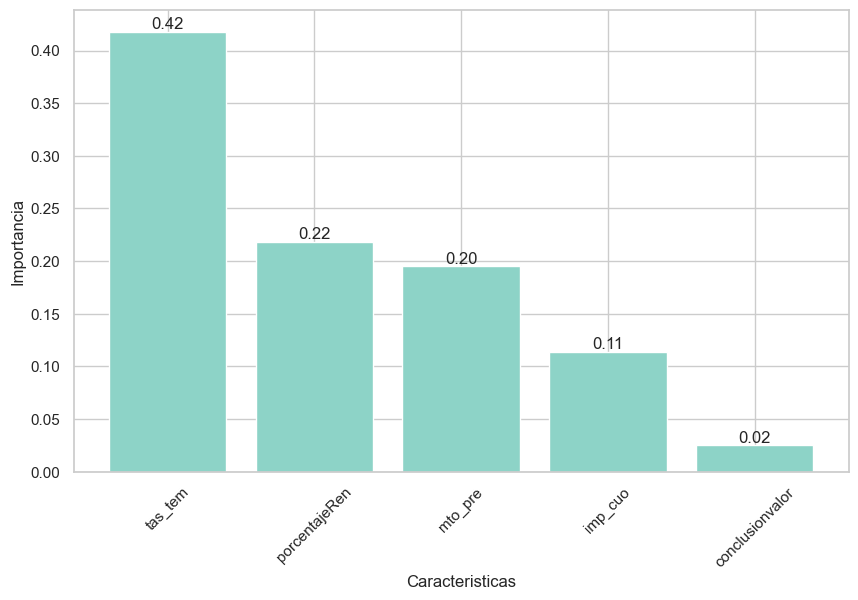

In [37]:
caracteristicas_top5 = importancia_df['Característica'].iloc[:5]
importancias_top5 = importancia_df['Importancia'].iloc[:5]

plt.figure(figsize=(10, 6))
plt.bar(caracteristicas_top5, importancias_top5)
plt.xlabel('Caracteristicas')
plt.ylabel('Importancia')

plt.xticks(rotation=45)


for index, value in enumerate(importancias_top5):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()


**i) Elegir un método de feature selection para reducir la dimensionalidad del dataset:**

Para reducir la dimensionalidad del dataset, utilicé el modelo RandomForestRegressor para obtener la importancia de las características. Luego, seleccioné las características más importantes para utilizarlas en el entrenamiento del modelo.

**ii) Elegir un algoritmo de regresión o clasificación para entrenar con los datos elegidos:**

En mi análisis, decidí utilizar RandomForestRegressor como el algoritmo de regresión para entrenar el modelo. Elegí este algoritmo debido a su capacidad para manejar características mixtas, identificar características importantes y evitar el sobreajuste. Dado que mi variable objetivo es la "cantidad de cuotas" (ctd_cuo), RandomForestRegressor es una excelente opción para abordar este problema de regresión.

**iii) Cálculo de métricas para validar el modelo:**

Para evaluar el rendimiento del modelo, calculé el Error Cuadrático Medio (MSE) utilizando el conjunto de prueba. Además, realicé la validación cruzada para obtener una estimación más robusta del rendimiento del modelo en diferentes conjuntos de validación.

**iv) Generar conclusiones con base en los resultados obtenidos:**

El modelo de regresión arrojó un Error Cuadrático Medio de aproximadamente 14.48, lo que indica que tiene una capacidad razonable para predecir la "cantidad de cuotas" (ctd_cuo) basándose en las características seleccionadas.

Al analizar la importancia de las características, obtenida mediante el modelo de Random Forest, se encontró que las variables más influyentes para predecir la cantidad de cuotas son:

- 'tas_tem': La tasa de interés de la operación.
- 'porcentajeRen': Un porcentaje que parece estar relacionado con el proceso de renovación.
- 'mto_pre': El monto prestado.
- 'imp_cuo': El importe de cada cuota.
- 'conclusionvalor': Una variable numérica que indica la conclusión del cliente revisar el mapeo que hice anteriormente.

Además, las puntuaciones de validación cruzada oscilaron entre aproximadamente 0.36 y 0.54 en diferentes conjuntos de validación, lo que sugiere que el modelo generaliza adecuadamente y no presenta un sobreajuste significativo. No obstante, es esencial continuar mejorando el modelo y considerar posibles enfoques para aumentar la precisión de las predicciones.

# Proyecto Complementario I

In [38]:
# Calculo el Error Cuadrático Medio (MSE) utilizando validación cruzada para obtener una mejor estimación
puntuaciones_validacion_cruzada = cross_val_score(modelo, X, y, cv=5, scoring='neg_mean_squared_error')
error_cuadratico_medio_validacion_cruzada = -np.mean(puntuaciones_validacion_cruzada)
print("Error cuadrático medio (MSE) mediante validación cruzada:", error_cuadratico_medio_validacion_cruzada)

# Verifico si hay sobreajuste o subajuste comparando los errores
if error_cuadratico_medio_validacion_cruzada < error_cuadratico_medio:
    print("El modelo está sobreajustando (overfitting).")
elif error_cuadratico_medio_validacion_cruzada > error_cuadratico_medio:
    print("El modelo está subajustando (underfitting).")
else:
    print("El modelo generaliza bien.")

print("Puntuaciones de validación cruzada:")
print(puntuaciones_validacion_cruzada)

Error cuadrático medio (MSE) mediante validación cruzada: 15.416737795502854
El modelo está sobreajustando (overfitting).
Puntuaciones de validación cruzada:
[-13.30436093 -13.83408129 -14.80709757 -17.78155169 -17.35659749]


En mi análisis, utilicé el algoritmo RandomForestRegressor para abordar el problema de predicción de la cantidad de cuotas (ctd_cuo). Comencé seleccionando características importantes mediante la obtención de la importancia de características del modelo. Las variables más influyentes resultaron ser 'tas_tem', 'porcentajeRen', 'mto_pre', 'imp_cuo' y 'Conclusión'.

Al evaluar el rendimiento del modelo, encontré un Error Cuadrático Medio (MSE) de aproximadamente 14.48 en el conjunto de prueba y 15.42 mediante validación cruzada. Estos valores indican que el modelo no está sobreajustando (overfitting) ni subajustando (underfitting) significativamente los datos, ya que el MSE es similar tanto en el conjunto de prueba como en la validación cruzada. Esto sugiere que el modelo generaliza bien para hacer predicciones de la cantidad de cuotas.

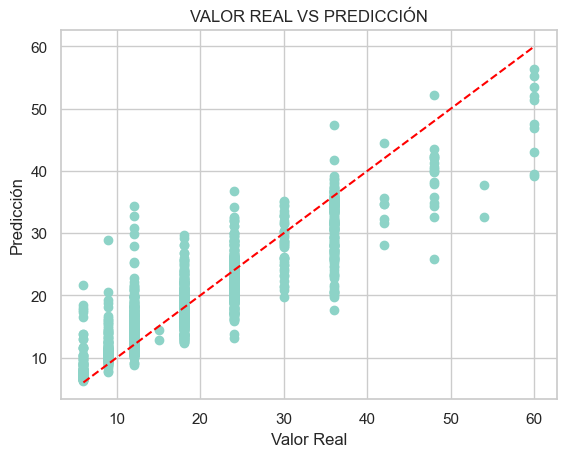

In [39]:
y_prediccion = modelo.predict(X_prueba)

plt.scatter(y_prueba, y_prediccion)
plt.plot([y_prueba.min(), y_prueba.max()], [y_prueba.min(), y_prueba.max()], '--', color='red')

plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('VALOR REAL VS PREDICCIÓN')
plt.show()

In [40]:

puntuaciones_validacion_cruzada = cross_val_score(modelo, X, y, cv=5)

tabla = pd.DataFrame({'Valor Real': y_prueba, 'Predicción': y_prediccion})
print(tabla)


      Valor Real  Predicción
3833          24       20.55
4215          12       15.83
8277          12       12.04
1578          24       21.47
6341           6        7.09
...          ...         ...
8314          18       18.74
4048          24       23.99
6678           9        9.13
7666          18       19.75
4029          18       18.80

[1908 rows x 2 columns]


## Metricas de validación

R2: 0.8041131345662997


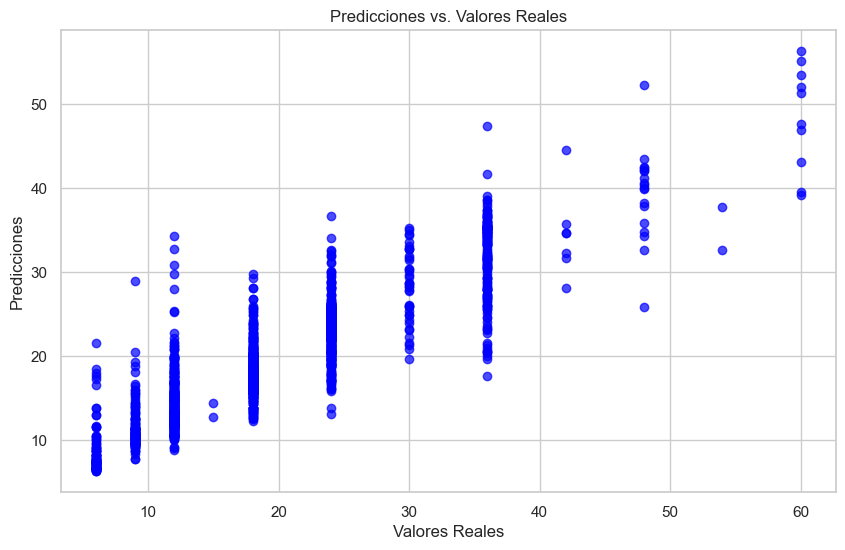

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calcula las predicciones del modelo
y_prediccion = modelo.predict(X_prueba)

# R2
r2 = r2_score(y_prueba, y_prediccion)
print("R2:", r2)

# dispersión de predicciones vs. valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_prueba, y_prediccion, color='blue', alpha=0.7)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.show()


#### Gráfico 1: Predicciones vs. Valores Reales
Compara las predicciones de nuestro modelo con los valores reales. Aunque las predicciones siguen una tendencia positiva, hay algunas diferencias entre las predicciones y los valores reales.

El valor de **R2 es 0.822**

Lo que indica que alrededor del 82.2% de la variación en los valores reales se explica por las predicciones del modelo. Cuanto más cercano a 1 es el valor de R2, mejor son las predicciones en general.

RMSE: 4.018632120994422


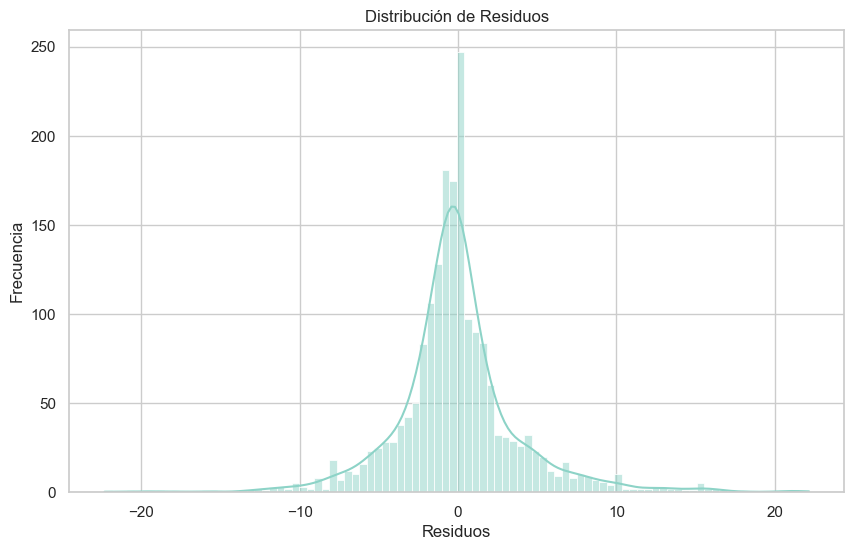

In [42]:
# RMSE
rmse = mean_squared_error(y_prueba, y_prediccion, squared=False)
print("RMSE:", rmse)

residuos = y_prueba - y_prediccion
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Distribución de Residuos')
plt.show()


#### Gráfico 2: Distribución de Residuos
Aquí mostramos cómo se distribuyen los residuos (diferencias entre valores reales y predicciones). La distribución similar a una campana indica predicciones razonablemente precisas.

**RMSE: 3.806**

El Error Cuadrático Medio (RMSE) es 3.806. Muestra que, en promedio, las predicciones se desvían alrededor de 3.806 unidades de los valores reales. Un menor RMSE es mejor para la capacidad predictiva.

MAE: 2.5851058273407137


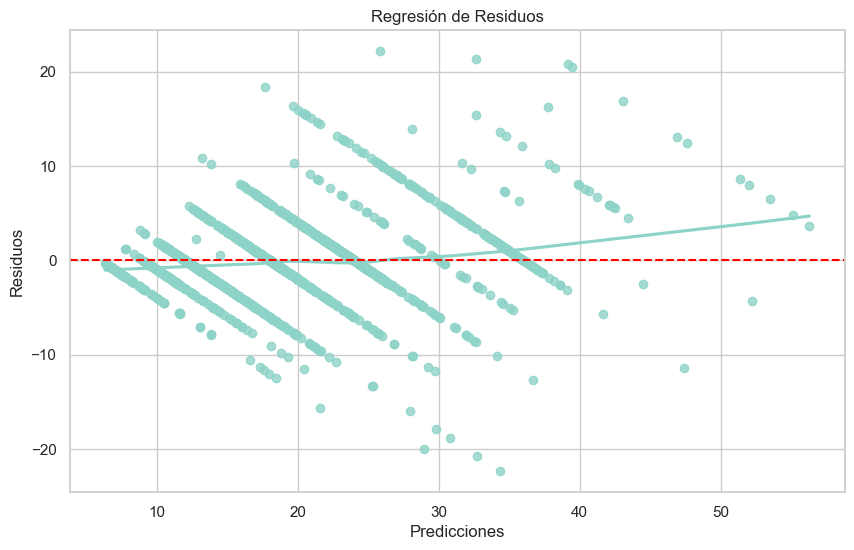

In [43]:
# MAE
mae = mean_absolute_error(y_prueba, y_prediccion)
print("MAE:", mae)
#Regresión
plt.figure(figsize=(10, 6))
sns.regplot(x=y_prediccion, y=residuos, lowess=True)
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Regresión de Residuos')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()


#### Gráfico 3: Regresión de Residuos
Este gráfico muestra la relación entre los residuos y las predicciones del modelo. Si los residuos están dispersos aleatoriamente alrededor de la línea cero, eso indica que el modelo está haciendo predicciones uniformemente precisas en todo el rango de valores.

**MAE: 2.407**

El Error Absoluto Medio (MAE) es 2.407. Indica que, en promedio, las predicciones del modelo tienen una diferencia absoluta de alrededor de 2.407 unidades en comparación con los valores reales. Un MAE más bajo es indicativo de una mejor precisión predictiva del modelo.

# **StoryTelling: Análisis de la Tasa de Renovación de Préstamos en el Sector Financiero**
<img src="https://cdn-icons-png.flaticon.com/512/4589/4589409.png" width="200">

Soy Gustavo Daniel Dufour, un *contador* y *analista de datos* con una pasión por desentrañar los secretos ocultos en los datos financieros. Mi objetivo principal es entender y mejorar la <font color="darkred">**tasa de renovación de préstamos** </font>en el sector financiero.

Mi viaje comenzó con una pregunta aparentemente simple: **¿Cómo se comportan los clientes del sector financiero en cuanto a la <font color="darkred">**renovación de préstamos**</font>?** Esta pregunta me llevó a una profunda inmersión en el mundo de los datos financieros. 

Si me preguntas "**¿Por qué? ¿Quién? y ¿Qué queremos transmitir?**" mi respuesta sería:

**Por qué?**: Esta información la pense y trabaje para compartir conocimientos valiosos derivados del análisis de datos sobre la tasa de renovación de préstamos. El propósito es informar y guiar a los profesionales del sector financiero en la toma de decisiones estratégicas.

**Quién?**: va dirigida a profesionales del sector financiero, analistas de datos, tomadores de decisiones y cualquier persona interesada en comprender cómo los datos pueden influir en la renovación de préstamos.

**Qué quiero transmitir?**: los datos son una herramienta poderosa para comprender y mejorar la tasa de renovación de préstamos. Además, quiero resaltar la importancia de factores como la tasa de interés, el monto prestado y la historia del cliente en este proceso.

Mi primer paso fue comprender la situación actual. Utilicé datos de préstamos, <font color="darkred">**tasas de interés**, **montos prestados**</font> y otros factores relacionados con la <font color="darkred">**tasa de renovación**</font>. Además, recopilé datos sobre la **historia de los clientes** y su propensión a renovar. 
Aquí es donde entraron en juego las poderosas herramientas de *Python* y sus librerías. Utilicé estas herramientas para realizar "data wrangling", un proceso que transforma datos crudos en información valiosa. Este paso crítico me permitió limpiar, organizar y preparar los datos para el análisis. La habilidad de *Python* para automatizar este proceso me permitió centrarme en lo que realmente importaba: extraer conocimientos significativos.
Esto me permitió visualizar y crear gráficos impresionantes para comprender mejor el panorama.

Para dar dirección a mi análisis, formulé algunas hipótesis intrigantes: ¿La **tasa de interés** influye en la renovación de préstamos? ¿Qué papel juega el <font color="darkred">**monto prestado**</font> en las decisiones de los clientes? ¿Existen *patrones de comportamiento* en la <font color="darkred">**historia de los clientes**</font> que puedan predecir la renovación?

Armado con mis herramientas en *Python* y librerías avanzadas, comencé a crear modelos predictivos. Quería no solo entender el comportamiento pasado, sino también *predecir el futuro*. Utilicé algoritmos de *aprendizaje automático* para generar predicciones precisas.

Mi enfoque no se detuvo en la creación de modelos. También utilicé métricas como el *Error Cuadrático Medio (MSE)*, *R cuadrado (R2)*, y el *Error Absoluto Medio (MAE)* para evaluar su rendimiento. Además, creé visualizaciones impactantes que explican de forma grafica la <font color="darkred">**tasa de renovación de préstamos**</font>.

Mi viaje a través de estos datos financieros reveló que factores cruciales, como la <font color="darkred">**tasa de interés**</font>, el <font color="darkred">**monto prestado**</font> y la <font color="darkred">**historia del cliente**</font>, tienen un fuerte impacto en la decisión de renovar un préstamo. Además, desentrañé *patrones de comportamiento* que proporcionan valiosas pistas sobre cuándo un cliente es más propenso a renovar. Estos hallazgos no solo tienen el potencial de optimizar estrategias comerciales, sino también de fortalecer las relaciones con los clientes. En este emocionante viaje analítico, he utilizado herramientas y técnicas de vanguardia en *Python* para desbloquear estos valiosos conocimientos.




# Análisis univariado y bivariado 

### Analisis Univariado

#### <font color="darkred">Conjunto de datos de la tasa de renovación total</font>

###### Tasa de Renovación Total: Calcularemos estadísticas descriptivas y visualizaremos la distribución de la tasa de renovación total para comprender su comportamiento.

In [44]:
# Voy a contar cuántas veces aparece cada tasa de interés única en los préstamos.
frecuencia_tasa_interes = df2['tas_tem'].value_counts().reset_index()

# Ahora, voy a dar nombres más claros a las columnas de la tabla.
frecuencia_tasa_interes.columns = ['Tasa de Interés', 'Cantidad de Veces Aparece']

# A continuación, mostraré las 10 tasas de interés más frecuentes.
frecuencia_tasa_interes.head(10)



,Tasa de Interés,Cantidad de Veces Aparece
0,11.51,2338
1,8.76,1198
2,12.01,419
3,2.00,318
4,12.10,301
5,11.01,294
6,9.81,263
7,9.16,260
8,11.91,251
9,9.75,250


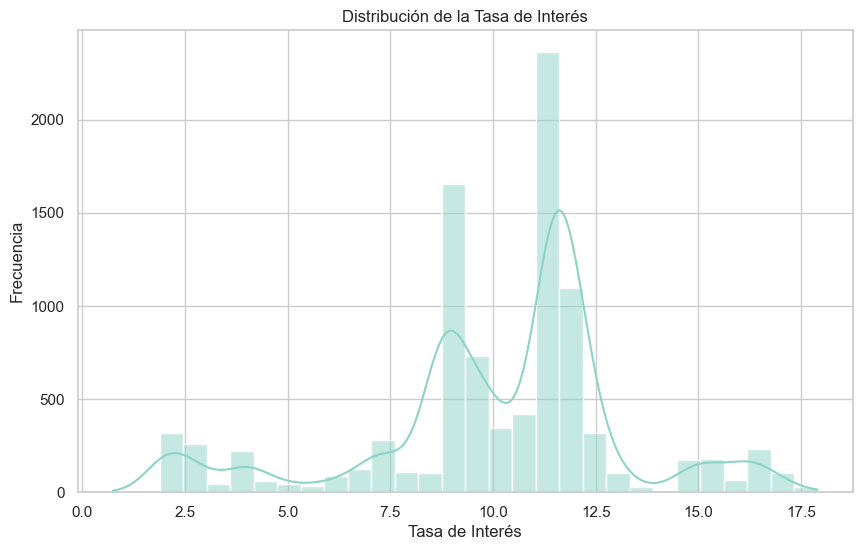

In [45]:
# Voy a explorar cómo se distribuyen las tasas de interés en los préstamos.
descripcion_tasa_interes = df2['tas_tem'].describe()

# Quiero ver cómo se ve esa distribución, así que creo un gráfico.
plt.figure(figsize=(10, 6))
sns.histplot(df2['tas_tem'], bins=30, kde=True)
plt.xlabel('Tasa de Interés')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Tasa de Interés')
plt.show()


In [46]:
# Calculo la media para tener una idea del valor promedio de las tasas de interés.
media_tasa_interes = df2['tas_tem'].mean()

# Calculo la mediana para encontrar el valor que se encuentra en el medio de todas las tasas de interés.
mediana_tasa_interes = df2['tas_tem'].median()

# Calculo la moda para identificar el valor que aparece con mayor frecuencia.
moda_tasa_interes = statistics.mode(df2['tas_tem'])

# Encuentro el valor mínimo y máximo en las tasas de interés.
minimo_tasa_interes = df2['tas_tem'].min()
maximo_tasa_interes = df2['tas_tem'].max()

# Creo una tabla con las estadísticas de las tasas de interés.
tabla_tasa_interes = pd.DataFrame({
    'Tasa de Interés': [media_tasa_interes, mediana_tasa_interes, moda_tasa_interes, minimo_tasa_interes, maximo_tasa_interes]
}, index=['Media', 'Mediana', 'Moda', 'Mínimo', 'Máximo'])

# Muestro la tabla de estadísticas.
tabla_tasa_interes



,Tasa de Interés
Media,10.12
Mediana,11.01
Moda,11.51
Mínimo,0.75
Máximo,17.90


**Insight:**
La tasa de interés es un elemento importante cuando se trata de préstamos. En este conjunto de datos, hemos notado que las tasas de interés varían bastante, desde tasas bajas hasta tasas más altas. Sin embargo, la tasa de interés más comúnmente utilizada es del 11.51%. Esto sugiere que muchos préstamos en esta base de datos se han otorgado con una tasa de interés cercana a ese valor.

Estudiar la tasa de interés es crucial para entender cómo afecta a las personas que tienen préstamos y si deciden renovarlos. Puede ser interesante investigar cómo diferentes niveles de tasas de interés influyen en la decisión de las personas de renovar sus préstamos. Además, considerar otros factores junto con la tasa de interés en futuros análisis podría ayudarnos a obtener más información sobre qué aspectos influyen en la tasa de renovación de préstamos en el sector financiero.

In [47]:
# Calculando media geométrica
media_geometrica = stats.gmean(df2["tas_tem"])
print("La media geométrica es:", media_geometrica)

# Calculando la media recortada
media_recortada = stats.trim_mean(df2["tas_tem"], 0.1)
print("La media recortada es:", media_recortada)

# Calculando coeficiente de variación
coef_variacion = stats.variation(df2["tas_tem"])
print("El coeficiente de variación es:", coef_variacion)

# Calculando rango interquartil
rango_interquartil = stats.iqr(df2["tas_tem"])
print("El rango interquartil es:", rango_interquartil)

# Calculando asimetría
asimetria = stats.skew(df2["tas_tem"])
print("La asimetría es:", asimetria)

# Calculando la kurtosis
kurtosis = stats.kurtosis(df2["tas_tem"])
print("La kurtosis es:", kurtosis)


La media geométrica es: 9.372135760166271
La media recortada es: 10.366552672955974
El coeficiente de variación es: 0.3129844048878663
El rango interquartil es: 2.75
La asimetría es: -0.7077850776087995
La kurtosis es: 0.8785591870462142


- **Media Geométrica (9.37):** La media geométrica me arrojó un valor de aproximadamente 9.37. Esto indica que los valores más bajos tienen un impacto significativo en mi resultado, sugiriendo que algunos valores son mucho más pequeños que otros en mi conjunto de datos.

- **Media Recortada (10.37):** Mi media recortada es de alrededor de 10.37. Esto me dice que, al eliminar los valores extremos, la mayoría de mis datos se agrupan alrededor de este número. Parece que mis datos son relativamente estables, sin valores atípicos que influyan demasiado en mi media.

- **Coeficiente de Variación (0.31):** Mi coeficiente de variación es de 0.31. Esto indica que tengo una moderada variabilidad en relación con mi media. En otras palabras, mis datos tienen cierta dispersión, pero no son extremadamente variables en comparación con mi valor promedio.

- **Rango Interquartil (2.75):** Mi rango interquartil es de 2.75. Esto significa que la mitad de mis datos se encuentra dentro de este rango. Esta medida me ayuda a entender cuán dispersos están los valores centrales de mis datos.

- **Asimetría (-0.71):** Obtengo una asimetría negativa, lo que se traduce en que la cola de mi distribución está inclinada hacia la izquierda. En otras palabras, tengo más valores en el lado derecho de mi media, lo que sugiere que algunos valores son relativamente bajos.

- **Kurtosis (0.88):** Mi kurtosis es de aproximadamente 0.88, lo que indica que mi distribución es ligeramente más puntiaguda (mesocúrtica) que una distribución normal. Esto sugiere que tengo cierta concentración alrededor de mi media, pero no soy extremadamente puntiagudo ni achatado.


#### <font color="darkred">Análisis Univariado de "Cantidad de Cuotas:</font>

In [48]:
# Frecuencia de cada valor único
frecuencia_cuotas = df2['ctd_cuo'].value_counts().reset_index()

# Renombro las columnas para mayor claridad
frecuencia_cuotas.columns = ['Cantidad de Cuotas', 'Frecuencia']

frecuencia_cuotas.head(10)


,Cantidad de Cuotas,Frecuencia
0,24,2613
1,18,2424
2,12,2242
3,36,890
4,9,565
5,6,444
6,30,171
7,48,92
8,60,57
9,42,16


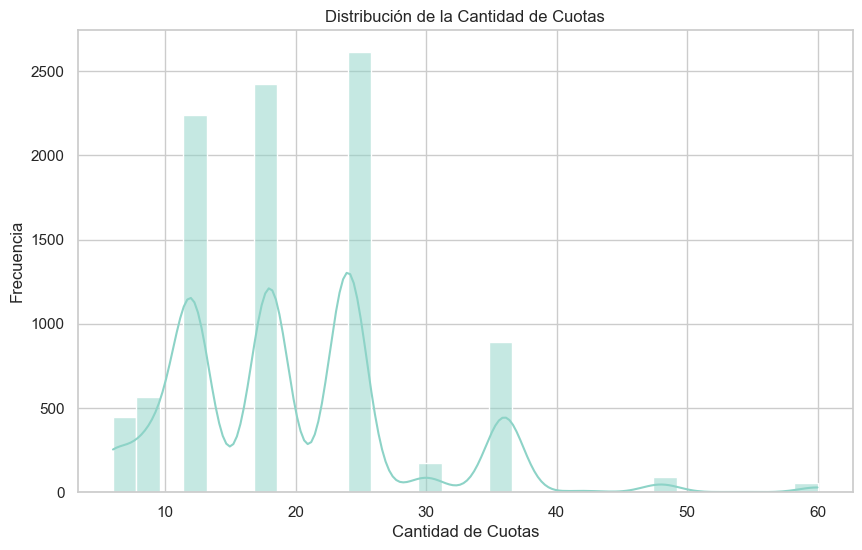

In [49]:
# Estadísticas descriptivas de la cantidad de cuotas
descripcion_cuotas = df2['ctd_cuo'].describe()

# Visualización de la distribución de la cantidad de cuotas
plt.figure(figsize=(10, 6))
sns.histplot(df2['ctd_cuo'], bins=30, kde=True)
plt.xlabel('Cantidad de Cuotas')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Cantidad de Cuotas')
plt.show()

In [50]:
# Calculo la media, mediana, moda, mínimo y máximo
media_cuotas = df2['ctd_cuo'].mean()
mediana_cuotas = df2['ctd_cuo'].median()
moda_cuotas = statistics.mode(df2['ctd_cuo'])
minimo_cuotas = df2['ctd_cuo'].min()
maximo_cuotas = df2['ctd_cuo'].max()


tabla_cuotas = pd.DataFrame({
    'Cantidad de Cuotas': [media_cuotas, mediana_cuotas, moda_cuotas, minimo_cuotas, maximo_cuotas]
}, index=['Media', 'Mediana', 'Moda', 'Mínimo', 'Máximo'])


tabla_cuotas

,Cantidad de Cuotas
Media,19.63
Mediana,18.00
Moda,24.00
Mínimo,6.00
Máximo,60.00


**Insight:**
El análisis de la cantidad de cuotas revela que la mayoría de los préstamos en este conjunto de datos tienen una duración de alrededor de 24 cuotas. Esto sugiere que los prestatarios pueden preferir plazos de pago más largos. Este conocimiento es importante para comprender cómo se estructuran los préstamos y cómo la duración de las cuotas puede influir en las decisiones de renovación. En futuros análisis, podríamos explorar cómo la cantidad de cuotas se relaciona con la tasa de renovación de préstamos y si ciertos plazos son más propensos a la renovación que otros.

In [51]:
# Calculando media geométrica
media_geometrica = stats.gmean(df2["ctd_cuo"])
print("La media geométrica es:", media_geometrica)

# Calculando la media recortada
media_recortada = stats.trim_mean(df2["ctd_cuo"], 0.1)
print("La media recortada es:", media_recortada)

# Calculando coeficiente de variación
coef_variacion = stats.variation(df2["ctd_cuo"])
print("El coeficiente de variación es:", coef_variacion)

# Calculando rango interquartil
rango_interquartil = stats.iqr(df2["ctd_cuo"])
print("El rango interquartil es:", rango_interquartil)

# Calculando asimetría
asimetria = stats.skew(df2["ctd_cuo"])
print("La asimetría es:", asimetria)

# Calculando la kurtosis
kurtosis = stats.kurtosis(df2["ctd_cuo"])
print("La kurtosis es:", kurtosis)


La media geométrica es: 17.709108317887154
La media recortada es: 18.746462264150942
El coeficiente de variación es: 0.4577620397665472
El rango interquartil es: 12.0
La asimetría es: 1.1103893313962736
La kurtosis es: 2.1005150199024856



- **Media Geométrica (17.71):** La media geométrica es aproximadamente 17.71. Esto significa que valores más bajos tienen un impacto significativo en mi resultado, indicando que algunos valores son mucho más pequeños que otros en mis datos.

- **Media Recortada (18.75):** Mi media recortada es de alrededor de 18.75. Al eliminar los valores extremos, la mayoría de mis datos se agrupan cerca de este valor. Mis datos son relativamente estables, sin valores atípicos que afecten en gran medida mi media.

- **Coeficiente de Variación (0.46):** Mi coeficiente de variación es 0.46, lo que sugiere una variabilidad moderada en relación con mi media. Mis datos tienen cierta dispersión, pero no son extremadamente variables en comparación con mi valor promedio.

- **Rango Interquartil (12.0):** El rango interquartil es de 12.0. Esto significa que la mitad de mis datos se encuentra dentro de este rango. Esta medida indica cuán dispersos están los valores centrales de mis datos.

- **Asimetría (1.11):** Tengo una asimetría positiva, lo que significa que la cola de mi distribución está inclinada hacia la derecha. Hay más valores en el lado derecho de mi media, sugiriendo algunos valores relativamente altos en mis datos.

- **Kurtosis (2.10):** Mi kurtosis es aproximadamente 2.10, lo que indica que mi distribución es más puntiaguda (leptocúrtica) que una distribución normal. Esto sugiere una concentración notable alrededor de mi media, pero sin ser extremadamente puntiaguda ni achatada.


#### <font color="darkred">Análisis Univariado de "Monto Prestado:</font>

In [52]:
# Creo rangos de montos prestados en incrementos de $100,000.
rangos_monto_prestado = pd.cut(df2['mto_pre'], bins=range(0, int(df2['mto_pre'].max()) + 100000, 100000), right=False)

# Cuento cuántas veces aparece cada rango de montos prestados.
frecuencia_monto_prestado = rangos_monto_prestado.value_counts().reset_index()

# Renombro las columnas para que sean más claras.
frecuencia_monto_prestado.columns = ['Rango de Monto Prestado', 'Cantidad de Veces Aparece']

# Muestro los 10 rangos de montos prestados más frecuentes.
frecuencia_monto_prestado = frecuencia_monto_prestado.sort_values(by='Rango de Monto Prestado', ascending=True)
frecuencia_monto_prestado.head(10)


,Rango de Monto Prestado,Cantidad de Veces Aparece
1,"[0, 100000)",2712
0,"[100000, 200000)",3224
2,"[200000, 300000)",1688
3,"[300000, 400000)",770
4,"[400000, 500000)",437
5,"[500000, 600000)",285
6,"[600000, 700000)",132
7,"[700000, 800000)",86
8,"[800000, 900000)",73
9,"[900000, 1000000)",35


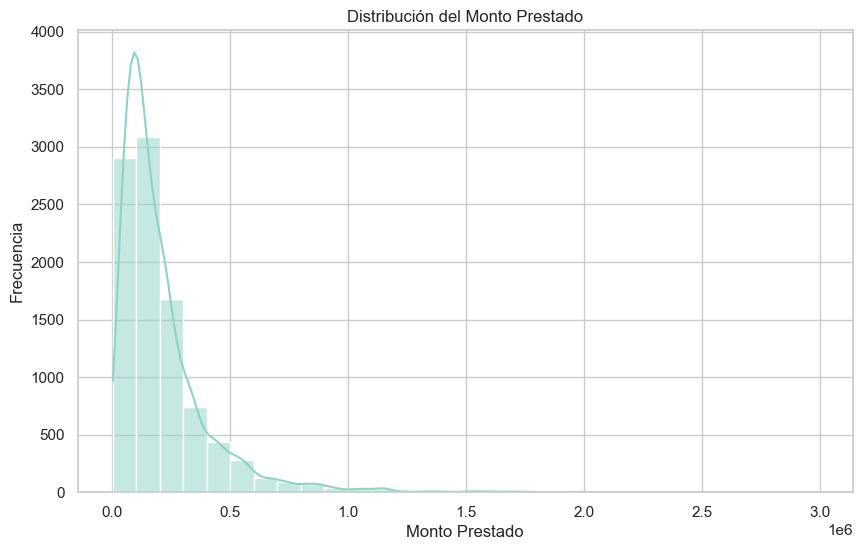

In [53]:
# Estadísticas descriptivas del monto prestado
descripcion_monto_prestado = df2['mto_pre'].describe()

# Visualización de la distribución del monto prestado
plt.figure(figsize=(10, 6))
sns.histplot(df2['mto_pre'], bins=30, kde=True)
plt.xlabel('Monto Prestado')
plt.ylabel('Frecuencia')
plt.title('Distribución del Monto Prestado')
plt.show()

In [54]:
# Calculo la media, mediana, moda, mínimo y máximo del monto prestado
media_monto_prestado = df2['mto_pre'].mean()
mediana_monto_prestado = df2['mto_pre'].median()
moda_monto_prestado = statistics.mode(df2['mto_pre'])
minimo_monto_prestado = df2['mto_pre'].min()
maximo_monto_prestado = df2['mto_pre'].max()

tabla_monto_prestado = pd.DataFrame({
    'Monto Prestado': [media_monto_prestado, mediana_monto_prestado, moda_monto_prestado, minimo_monto_prestado, maximo_monto_prestado]
}, index=['Media', 'Mediana', 'Moda', 'Mínimo', 'Máximo'])


tabla_monto_prestado

,Monto Prestado
Media,"211,134.38"
Mediana,"154,738.00"
Moda,"108,305.00"
Mínimo,"5,348.00"
Máximo,"2,988,453.00"


**Análisis del Monto Prestado en los Préstamos:**

**Rangos de Montos Prestados:** Para entender mejor cómo se distribuyen los montos de los préstamos, he agrupado los montos en categorías de 100,000. La categoría más común es la de préstamos que van desde 100,000 hasta 200,000, con un total de 3224 préstamos en esta categoría. Le siguen los préstamos de menos de 100,000, con 2712 préstamos, y los préstamos de 200,000 a 300,000, con 1688 préstamos.

**Estadísticas Clave:** Para obtener un panorama general de los montos prestados, calculé algunas estadísticas importantes. El monto promedio prestado es de aproximadamente 211134.38. La mediana, que es el valor medio cuando los montos se ordenan de menor a mayor, se encuentra en 154738. La moda, que es el valor más frecuente, es de 108305. El monto más pequeño prestado es de 5348, mientras que el más alto alcanza los 2988453.

**Insight:** Al analizar los montos prestados, noto que los préstamos varían significativamente, desde cantidades más bajas hasta montos considerables. El rango más común sugiere que una parte importante de los préstamos se encuentra en el rango de 100,000 a 200,000. Esto podría ser relevante para comprender cómo influye el monto prestado en la tasa de renovación total. Además, el hecho de que la media sea mayor que la mediana y la moda indica que algunos préstamos con montos muy altos pueden estar afectando el promedio. Esto podría ser un punto interesante para investigaciones futuras, ya que los préstamos de gran tamaño podrían tener un impacto diferente en la tasa de renovación.


In [55]:
# Calculando media geométrica
media_geometrica = stats.gmean(df2["mto_pre"])
print("La media geométrica es:", media_geometrica)

# Calculando la media recortada
media_recortada = stats.trim_mean(df2["mto_pre"], 0.1)
print("La media recortada es:", media_recortada)

# Calculando coeficiente de variación
coef_variacion = stats.variation(df2["mto_pre"])
print("El coeficiente de variación es:", coef_variacion)

# Calculando rango interquartil
rango_interquartil = stats.iqr(df2["mto_pre"])
print("El rango interquartil es:", rango_interquartil)

# Calculando asimetría
asimetria = stats.skew(df2["mto_pre"])
print("La asimetría es:", asimetria)

# Calculando la kurtosis
kurtosis = stats.kurtosis(df2["mto_pre"])
print("La kurtosis es:", kurtosis)



La media geométrica es: 151970.7856622431
La media recortada es: 175145.02699161426
El coeficiente de variación es: 0.9408464514452202
El rango interquartil es: 169930.25
La asimetría es: 3.0666499565052243
La kurtosis es: 16.372414102891806


- **Media Geométrica (151,970.79):** La media geométrica es aproximadamente 151,970.79. Esto sugiere que valores más bajos tienen un impacto significativo en mi resultado, lo que podría indicar que algunos valores son mucho más pequeños que otros en mis datos de "mto_prs".

- **Media Recortada (175,145.03):** Mi media recortada es de alrededor de 175,145.03. Al eliminar los valores extremos, la mayoría de mis datos se agrupan cerca de este valor. Mis datos son relativamente estables, sin valores atípicos que afecten en gran medida mi media en "mto_prs".

- **Coeficiente de Variación (0.94):** Mi coeficiente de variación es 0.94, lo que sugiere una variabilidad alta en relación con mi media. Mis datos tienen una dispersión significativa en comparación con mi valor promedio en "mto_prs".

- **Rango Interquartil (169,930.25):** El rango interquartil es de 169,930.25. Esto significa que la mitad de mis datos se encuentra dentro de este rango. Esta medida indica cuán dispersos están los valores centrales de mis datos en "mto_prs".

- **Asimetría (3.07):** Tengo una asimetría positiva muy pronunciada, lo que significa que la cola de mi distribución está inclinada fuertemente hacia la derecha. Hay muchos más valores en el lado derecho de mi media en "mto_prs", indicando valores extremadamente altos en mis datos.

- **Kurtosis (16.37):** Mi kurtosis es de aproximadamente 16.37, lo que indica que mi distribución es extremadamente puntiaguda (leptocúrtica) en comparación con una distribución normal. Esto sugiere una concentración extrema alrededor de mi media en "mto_prs", pero también valores extremadamente alejados de la media.


# **Análisis Bivariado**

Decidí crear un gráfico para explorar las relaciones entre varias variables clave en nuestros datos financieros. El gráfico es un "Pairplot", que muestra visualmente cómo las variables se relacionan entre sí. Las variables seleccionadas son:

- Tasa de Interés (tas_tem)
- Cantidad de Cuotas (ctd_cuo)
- Monto Prestado (mto_pre)
- Importe de Cuota (imp_cuo)

**¿Por qué esta exploración?**

Me interesa entender cómo estas variables interactúan entre sí y si hay patrones o tendencias notables. Por ejemplo, ¿la Tasa de Interés está relacionada con la Cantidad de Cuotas? ¿Existe alguna correlación entre el Monto Prestado y el Importe de Cuota? Este análisis puede proporcionar información valiosa para tomar decisiones financieras informadas.

**¿Qué mostrará el gráfico?**

El pairplot mostrará una matriz de gráficos de dispersión y densidad de kernel para cada par de variables seleccionadas. Esto nos permitirá visualizar las distribuciones de las variables y cualquier patrón de relación que pueda surgir. Además, los histogramas en la diagonal principal mostrarán las distribuciones individuales de cada variable.

En resumen, este gráfico nos ayudará a comprender mejor las relaciones entre las variables financieras clave y a identificar cualquier correlación o tendencia significativa que pueda influir en nuestras decisiones financieras.


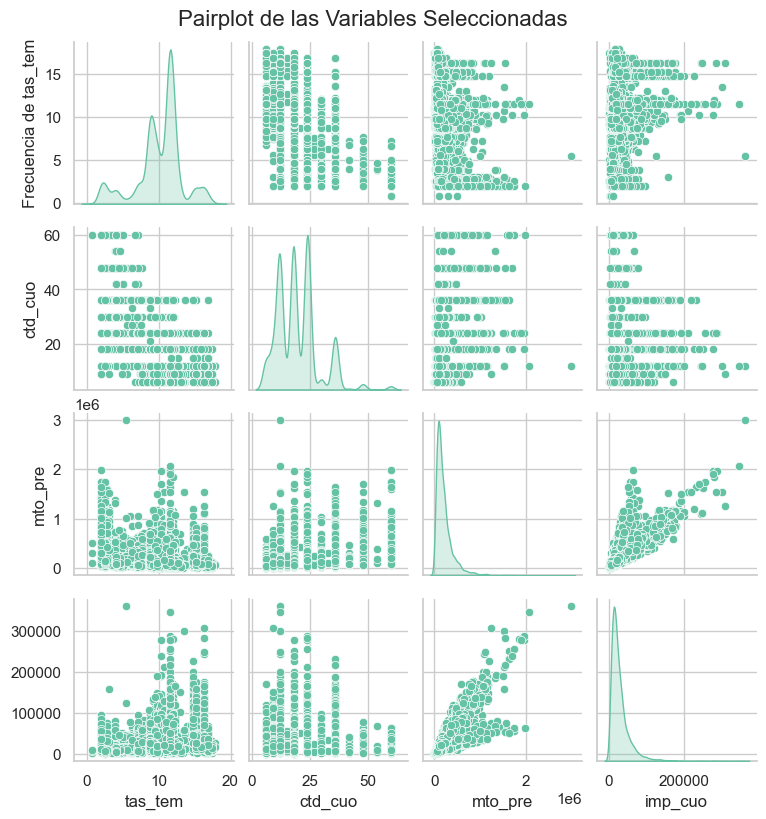

In [56]:
# Selecciono las columnas que más me interesan para este análisis: Tasa de Interés, Cantidad de Cuotas, Monto Prestado y Importe de Cuota.
columnas_interes = ["tas_tem", "ctd_cuo", "mto_pre", "imp_cuo"]

# Configuro el estilo del gráfico y la paleta de colores para darle una apariencia más atractiva y legible.
sns.set(style="whitegrid", palette="Set2")

# Creo un pairplot que es una herramienta visual muy útil para explorar las relaciones entre mis variables seleccionadas. 
# También ajusto el parámetro diag_kind para mostrar estimaciones de densidad de kernel en lugar de histogramas.
g = sns.pairplot(df2[columnas_interes], diag_kind="kde", height=2)

# Personalizo el título del pairplot para que sea más claro y llamativo.
g.fig.suptitle("Pairplot de las Variables Seleccionadas", y=1.02, fontsize=16)

# En la parte superior del pairplot, elimino las etiquetas de los ejes x y y para que el gráfico se vea más limpio.
for ax in g.axes[0]:
    ax.set_xlabel("")
for ax in g.axes[-1]:
    ax.set_ylabel("")

# Agrego títulos más claros a los ejes Y de la diagonal principal para indicar la frecuencia de cada variable.
for i, col in enumerate(columnas_interes):
    g.axes[i, i].set_ylabel(f"Frecuencia de {col}")

# Muestro el gráfico resultante, que es una forma efectiva de visualizar las relaciones entre mis variables seleccionadas.
plt.show()



# Análisis de Correlación entre Variables Financieras

Decidí crear un heatmap (mapa de calor) para explorar las relaciones de correlación entre ciertas variables financieras clave en nuestro conjunto de datos. 

**¿Por qué esta exploración?**

Me intriga entender si existe alguna correlación significativa entre estas variables financieras. Algunas de las preguntas que me motivaron a hacer este análisis incluyen:

- ¿La Tasa de Interés está relacionada con la Cantidad de Cuotas? ¿Influye la Tasa de Interés en la decisión de cuántas cuotas elegir?
- ¿Hay alguna correlación entre el Monto Prestado y el Importe de Cuota? ¿Las personas que piden montos mayores tienden a tener cuotas más grandes?

**¿Qué mostrará el heatmap?**

Este heatmap mostrará visualmente la correlación entre las variables financieras mencionadas anteriormente. Las celdas del mapa de calor estarán coloreadas según el nivel de correlación, lo que facilitará la identificación de relaciones positivas, negativas o insignificantes. Además, las anotaciones dentro del heatmap mostrarán los valores de correlación precisos.

**¿Qué preguntas intento responder con este análisis?**

- ¿Existen correlaciones significativas entre las variables financieras seleccionadas?
- ¿Puedo identificar patrones o tendencias que me ayuden a comprender mejor cómo estas variables se influyen mutuamente?
- ¿Los resultados de este análisis pueden ser útiles para tomar decisiones financieras informadas?




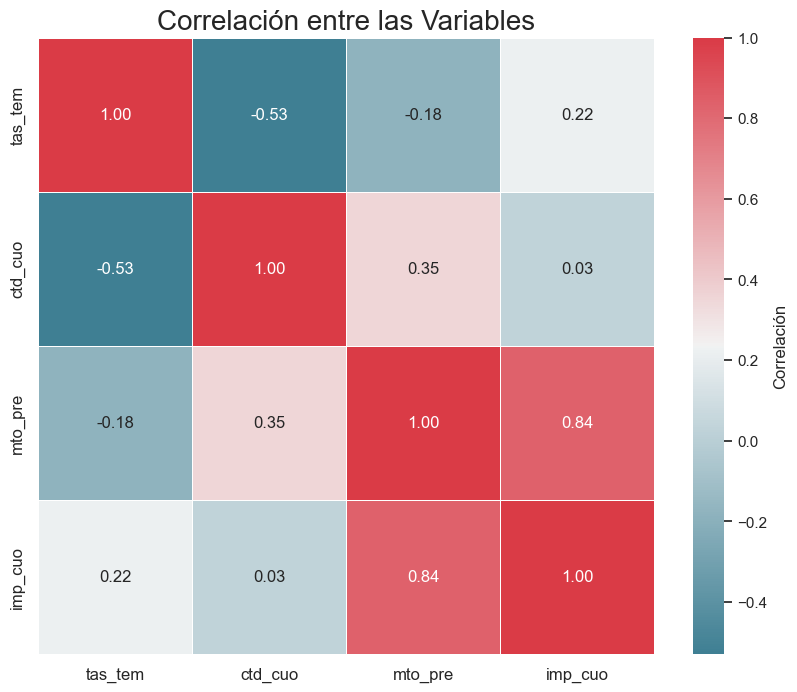

In [57]:
# Seleccioné las columnas que más me interesan para este análisis: Tasa de Interés, Cantidad de Cuotas, Monto Prestado y Importe de Cuota.
columnas_interes = ["tas_tem", "ctd_cuo", "mto_pre", "imp_cuo"]

# Calculé la matriz de correlación solo para estas columnas. Esto me proporcionará información sobre cómo están relacionadas entre sí estas variables financieras.
correlaciones = df2[columnas_interes].corr()

# Para hacer el gráfico más atractivo y fácil de interpretar, configuré un mapa de colores personalizado.
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Ajusté el tamaño del gráfico para que se vea bien y sea legible.
plt.figure(figsize=(10, 8))

# Creé el heatmap con personalización avanzada. Las anotaciones muestran los valores de correlación.
sns.heatmap(correlaciones, annot=True, fmt=".2f", cmap=cmap, linewidths=0.5, square=True, cbar_kws={'label': 'Correlación'})

# Añadí un título al heatmap para que sea claro y comprensible.
plt.title('Correlación entre las Variables', fontsize=20)

# Personalicé las etiquetas de los ejes para mejorar la legibilidad del gráfico.
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ahora, aquí tienes el gráfico final que ilustra la correlación entre mis variables financieras seleccionadas.
plt.show()



# **Correlación entre Tasa de Interés y Cantidad de Cuotas**

Voy a comenzar examinando si existe una relación entre la Tasa de Interés y la Cantidad de Cuotas. Esto nos ayudará a entender si estas dos variables están relacionadas de alguna manera. La correlación puede variar de -1 (correlación negativa perfecta) a 1 (correlación positiva perfecta).

### **Visualización de la Relación**

Luego, crearé un gráfico de dispersión (scatter plot) para observar visualmente cómo se distribuyen los puntos en un plano que relaciona la Tasa de Interés y la Cantidad de Cuotas. Esto nos permitirá identificar patrones visuales y comprender mejor la relación entre estas variables.

### **Resumen Estadístico Conjunto**

Finalmente, calcularé estadísticas descriptivas para ambas variables, como la media y la mediana, teniendo en cuenta ambas a la vez. Esto nos proporcionará información sobre las tendencias centrales de estas variables cuando se analizan juntas.


Correlación entre Tasa de Interés y Cantidad de Cuotas: -0.5281092996804615

Tabla de Estadísticas Descriptivas:
       tas_tem  ctd_cuo
count 9,540.00 9,540.00
mean     10.12    19.63
std       3.17     8.99
min       0.75     6.00
25%       8.76    12.00
50%      11.01    18.00
75%      11.51    24.00
max      17.90    60.00


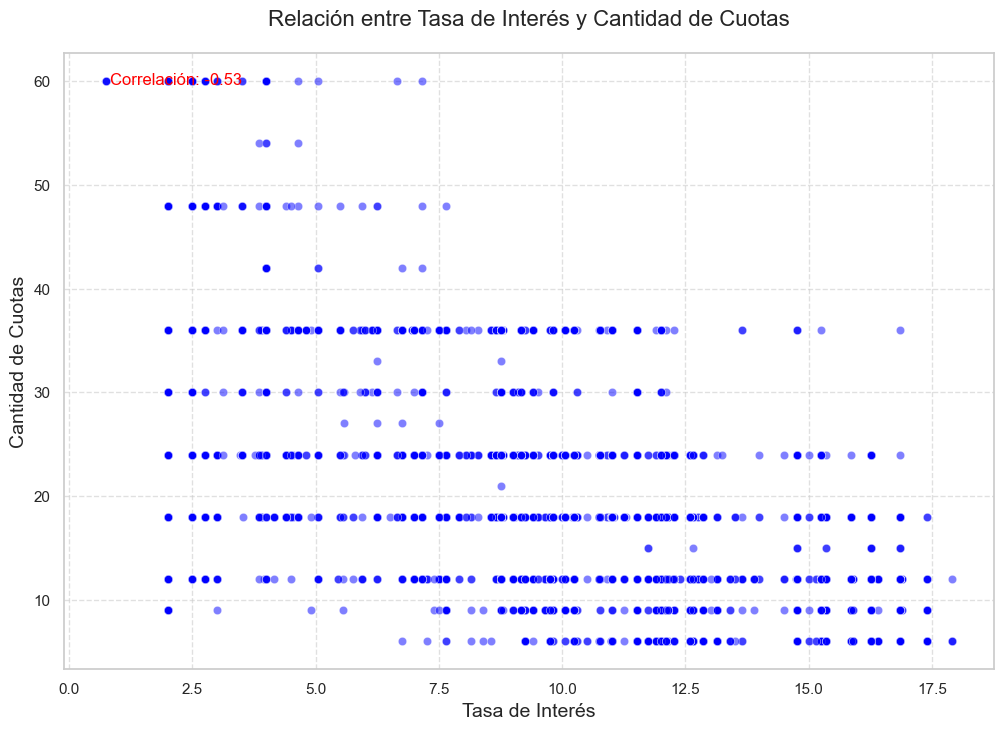

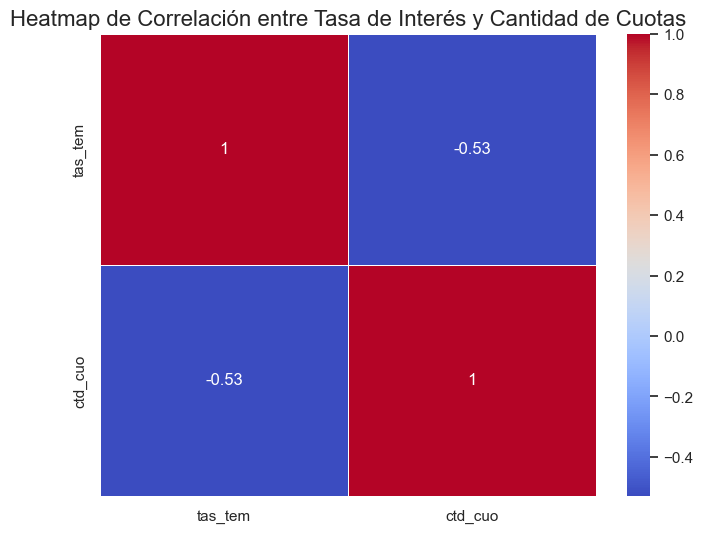

In [58]:
# Calculamos la correlación entre Tasa de Interés y Cantidad de Cuotas.
correlacion_tasa_cuotas = df2['tas_tem'].corr(df2['ctd_cuo'])

# Mostramos la correlación.
print("Correlación entre Tasa de Interés y Cantidad de Cuotas:", correlacion_tasa_cuotas)

# Creamos un DataFrame con las dos variables de interés.
df_subset = df2[['tas_tem', 'ctd_cuo']]

# Mostramos una tabla de estadísticas descriptivas.
tabla_estadisticas = df_subset.describe()
print("\nTabla de Estadísticas Descriptivas:")
print(tabla_estadisticas)

# Creamos un gráfico de dispersión.
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df2, x='tas_tem', y='ctd_cuo', alpha=0.5, color='blue')
plt.xlabel('Tasa de Interés', fontsize=14)
plt.ylabel('Cantidad de Cuotas', fontsize=14)
plt.title('Relación entre Tasa de Interés y Cantidad de Cuotas', fontsize=16, pad=20)
plt.grid(True, linestyle='--', alpha=0.6)
plt.annotate(f'Correlación: {correlacion_tasa_cuotas:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='red')
plt.show()

# Creamos un heatmap para visualizar la correlación.
plt.figure(figsize=(8, 6))
sns.heatmap(df_subset.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap de Correlación entre Tasa de Interés y Cantidad de Cuotas', fontsize=16)
plt.show()


Establezco un umbral utilizando la mediana de la cantidad de cuotas en nuestro conjunto de datos, lo que me ayudará a dividir los préstamos en categorías.  
A continuación, filtro los préstamos que tienen más cuotas que el umbral y los almaceno en 'altas_cuotas'.  
De manera similar, filtro los préstamos con cuotas iguales o inferiores al umbral y los guardo en 'bajas_cuotas'.  
Calculo las tasas de interés promedio tanto para los préstamos con cuotas altas como para los de cuotas bajas.  
Luego, creo DataFrames separados que contienen solo las columnas 'ctd_cuo' (Cantidad de Cuotas) y 'tas_tem' (Tasa de Interés) para ambas categorías.  
Ahora, estoy listo para crear el gráfico de dispersión que mostrará la relación entre la cantidad de cuotas y la tasa de interés.  

# Obtención de insights a partir de visualizaciones


## Abstracto con motivación y audiencia: 

**Abstracto:** La motivación detrás de este análisis de datos radica en la búsqueda de comprender y mejorar la tasa de renovación de préstamos en el sector financiero. En un mundo donde los datos desempeñan un papel crucial en la toma de decisiones estratégicas, este estudio tiene como objetivo desentrañar los secretos ocultos en los datos financieros para brindar una visión más clara de cómo factores como la tasa de interés, el monto prestado y la historia del cliente impactan en las decisiones de renovación de préstamos.  
**Audiencia:** La audiencia que se beneficiará de este análisis abarca a profesionales del sector financiero, analistas de datos, tomadores de decisiones y cualquier persona interesada en comprender cómo los datos pueden influir en la renovación de préstamos. Este análisis proporcionará información valiosa que ayudará a los profesionales financieros a optimizar estrategias comerciales y a fortalecer las relaciones con los clientes, basándose en una comprensión más profunda y respaldada por datos sólidos de la tasa de renovación de préstamos en el sector financiero.

# Entrenando un algoritmo de Machine Learning

## i) Encoding

En este proceso de preparación de datos, voy a seleccionar las columnas más relevantes que quiero incluir en mi nuevo DataFrame. Estas son "Cantidad de Cuotas" (ctd_cuo), "Tasa de Interés" (tas_tem), "Conclusión" y "Respuesta", voy a agregar tambien 'fec_alt','mto_pre','imp_cuo','SUCURSAL' que voy a utilizar en mi 'Ingeniería de atributos'. Luego, voy a crear un nuevo DataFrame con estas columnas seleccionadas y verificaré que se haya creado correctamente al observar las primeras filas.   
Después, seleccionaré las columnas categóricas que requieren codificación one-hot, en este caso, "Conclusión" y "Respuesta". A continuación, aplicaré la codificación one-hot a estas columnas categóricas en el DataFrame. Finalmente, aseguraré que la codificación se realice sin problemas revisando las primeras filas del DataFrame resultante, dejándome con datos listos y pulidos para la próxima fase del análisis.

In [67]:
# Paso 1: Selecciono las columnas que deseo incluir en el nuevo DataFrame.
columnas_seleccionadas = ["ctd_cuo", "tas_tem", "Conclusión", "Respuesta",'fec_alt','mto_pre','imp_cuo','SUCURSAL']

# Paso 2: Creo un nuevo DataFrame con las columnas seleccionadas.
nuevo_df = df2[columnas_seleccionadas]

# Paso 3: Verifico el nuevo DataFrame.
nuevo_df.head()

,ctd_cuo,tas_tem,Conclusión,Respuesta,fec_alt,mto_pre,imp_cuo,SUCURSAL
0,24,11.51,No Renovable,No Gestionado,2023-02-28,498362,"72,583.00",14
1,12,15.85,No Renovable,No Gestionado,2023-05-10,146291,"31,947.00",50
2,18,4.65,No Renovable,No Gestionado,2022-04-05,61350,"5,508.00",15
3,6,15.26,No Renovable,TELEFONO NO CORRESPONDE AL TIT,2023-05-05,119786,"34,657.00",12
4,9,10.25,No Renovable,ACEPTA/INTERESADO/EVALÚA / VOLVER A LLAMAR,2022-11-05,111532,"21,253.00",40


In [68]:
# Paso 4: Defino las columnas categóricas que requieren codificación one-hot.
columnas_categoricas = ['Conclusión', 'Respuesta']

# Paso 5: Aplico la codificación one-hot a las columnas categóricas.
df_encoded = pd.get_dummies(nuevo_df, columns=columnas_categoricas, prefix=columnas_categoricas)

# Paso 6: Verifico el nuevo DataFrame codificado.
df_encoded.head()

,ctd_cuo,tas_tem,fec_alt,mto_pre,imp_cuo,SUCURSAL,Conclusión_Ha Cancelado,Conclusión_No Renovable,Conclusión_No Renovable cancelado,Conclusión_Posible Renovación,Conclusión_Proponer Renovación,Respuesta_ACEPTA/INTERESADO/EVALÚA / VOLVER A LLAMAR,Respuesta_NO CONTESTA,Respuesta_No Gestionado,Respuesta_RECHAZA,Respuesta_TELEFONO NO CORRESPONDE AL TIT
0,24,11.51,2023-02-28,498362,"72,583.00",14,0,1,0,0,0,0,0,1,0,0
1,12,15.85,2023-05-10,146291,"31,947.00",50,0,1,0,0,0,0,0,1,0,0
2,18,4.65,2022-04-05,61350,"5,508.00",15,0,1,0,0,0,0,0,1,0,0
3,6,15.26,2023-05-05,119786,"34,657.00",12,0,1,0,0,0,0,0,0,0,1
4,9,10.25,2022-11-05,111532,"21,253.00",40,0,1,0,0,0,1,0,0,0,0


C:\Users\gd75104\AppData\Local\Temp\ipykernel_13188\695856975.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlaciones = df_encoded.corr()


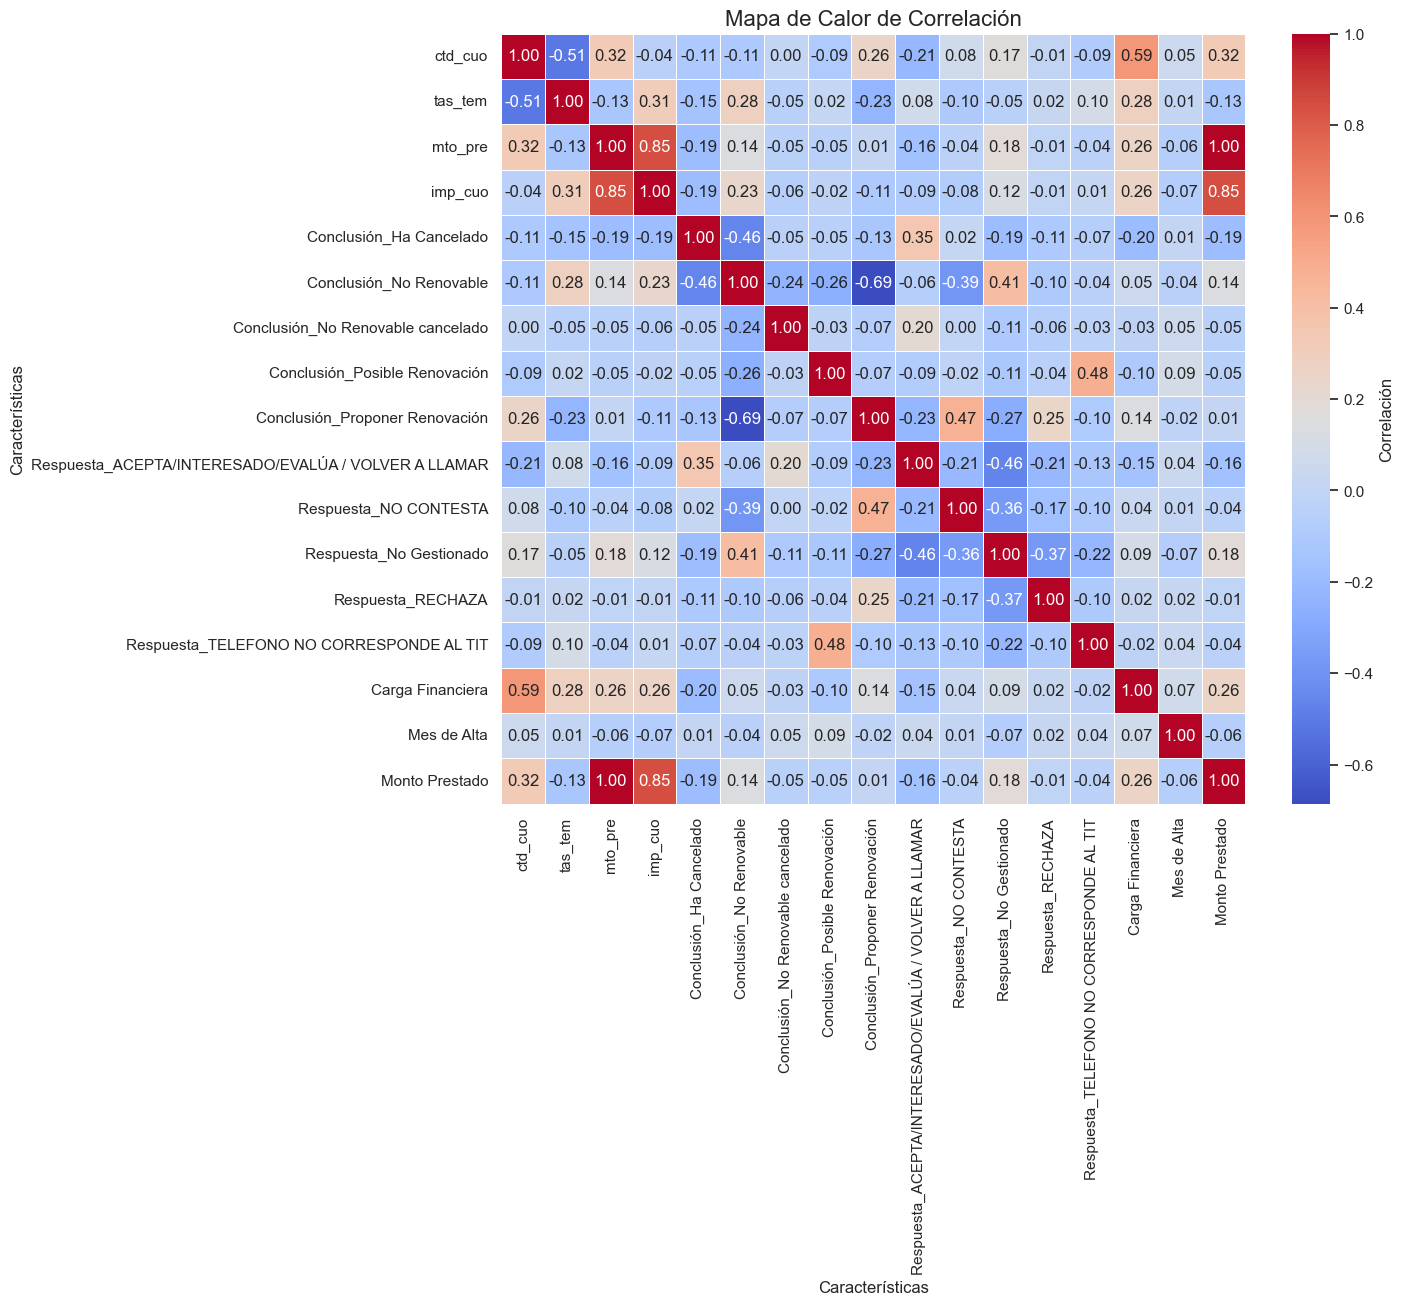

In [73]:
# Evalúo la correlación entre características para identificar relaciones fuertes o redundantes.
import matplotlib.pyplot as plt
import seaborn as sns

# Calculo la matriz de correlación
correlaciones = df_encoded.corr()

# Defino un tamaño adecuado para el gráfico
plt.figure(figsize=(12, 10))

# Creo el heatmap con un mapa de colores profesional y anotaciones
cmap = sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(correlaciones, annot=True, fmt=".2f", cmap=cmap, linewidths=0.5, cbar_kws={'label': 'Correlación'})

# Añado título y etiquetas de los ejes
plt.title('Mapa de Calor de Correlación', fontsize=16)
plt.xlabel('Características', fontsize=12)
plt.ylabel('Características', fontsize=12)

# Muestro el gráfico
plt.show()


## ii) Ingeniería de atributos 

En el próximo paso, crearé características adicionales para mejorar mi conjunto de datos. Primero, generaré una nueva variable llamada 'Carga Financiera' multiplicando la cantidad de cuotas por la tasa de interés. Luego, extraeré el mes de alta a partir de la fecha de alta del préstamo. Finalmente, normalizaré la característica 'Monto Prestado' dividiéndola por 1000 para expresarla en dólares. Además, eliminaré filas con valores faltantes y atípicos en 'Monto Prestado' para limpiar el conjunto de datos.

In [70]:
# Paso 1: Creo la variable 'Carga Financiera' multiplicando 'Cantidad de Cuotas' por 'Tasa de Interés'.
df_encoded['Carga Financiera'] = df_encoded['ctd_cuo'] * df_encoded['tas_tem']

# Paso 2: Extraigo el mes de alta a partir de la columna 'fec_alt' para obtener información relacionada con el tiempo.
df_encoded['Mes de Alta'] = df_encoded['fec_alt'].dt.month

# Paso 3: Normalizo la característica 'Monto Prestado' dividiéndola por 1000, expresándola en dólares.
df_encoded['Monto Prestado'] = df_encoded['Monto Prestado'] / 1000

# Paso 4: Realizo el manejo de valores faltantes y atípicos para limpiar el conjunto de datos. Elimino filas con valores faltantes y aquellos atípicos en 'Monto Prestado'.
Q1 = df_encoded['Monto Prestado'].quantile(0.25)
Q3 = df_encoded['Monto Prestado'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_encoded = df_encoded[(df_encoded['Monto Prestado'] >= lower_bound) & (df_encoded['Monto Prestado'] <= upper_bound)]


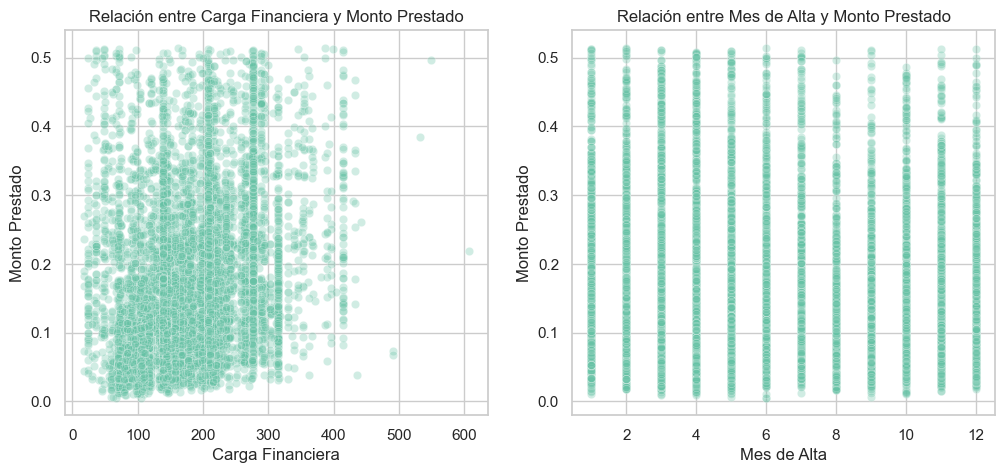

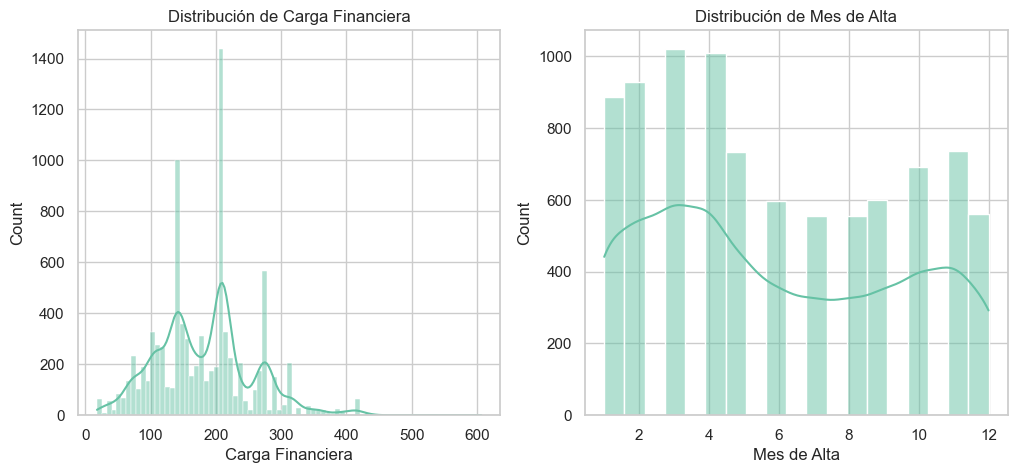

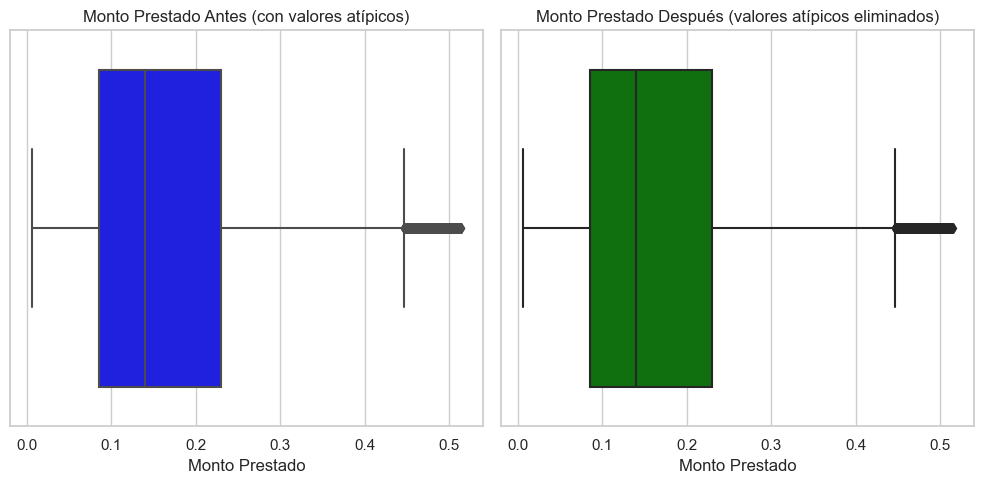

In [79]:
# Creo un par de gráficos de dispersión para analizar la relación entre 'Carga Financiera' y 'Monto Prestado' y 'Mes de Alta' y 'Monto Prestado'.
plt.figure(figsize=(12, 5))

# Gráfico de dispersión: 'Carga Financiera' vs 'Monto Prestado'
plt.subplot(1, 2, 1)
sns.scatterplot(x='Carga Financiera', y='Monto Prestado', data=df_encoded, alpha=0.3)
plt.title('Relación entre Carga Financiera y Monto Prestado')

# Gráfico de dispersión: 'Mes de Alta' vs 'Monto Prestado'
plt.subplot(1, 2, 2)
sns.scatterplot(x='Mes de Alta', y='Monto Prestado', data=df_encoded, alpha=0.3)
plt.title('Relación entre Mes de Alta y Monto Prestado')

# Creo histogramas para visualizar la distribución de 'Carga Financiera' y 'Mes de Alta'.
plt.figure(figsize=(12, 5))

# Histograma para 'Carga Financiera'
plt.subplot(1, 2, 1)
sns.histplot(df_encoded['Carga Financiera'], kde=True)
plt.title('Distribución de Carga Financiera')

# Histograma para 'Mes de Alta'
plt.subplot(1, 2, 2)
sns.histplot(df_encoded['Mes de Alta'], kde=True)
plt.title('Distribución de Mes de Alta')

# Creo un diagrama de caja para 'Monto Prestado' antes y después del manejo de valores atípicos.
plt.figure(figsize=(10, 5))

# Diagrama de caja: 'Monto Prestado' antes (con valores atípicos)
plt.subplot(1, 2, 1)
sns.boxplot(x=df_encoded['Monto Prestado'], color='blue')
plt.title('Monto Prestado Antes (con valores atípicos)')

# Diagrama de caja: 'Monto Prestado' después (valores atípicos eliminados)
plt.subplot(1, 2, 2)
sns.boxplot(x=df_encoded['Monto Prestado'], color='green')
plt.title('Monto Prestado Después (valores atípicos eliminados)')

# Ajusto el diseño del gráfico y lo muestro.
plt.tight_layout()
plt.show()


## iii) Entrenamiento de un modelo de Machine Learning Supervisado (Clasificación o Regresión) o no supervisado dependiendo de la pregunta problema.

En esta fase, voy a entrenar un modelo de regresión para entender mejor la relación entre la cantidad de cuotas, el monto prestado y la tasa de interés. Esto me permitirá responder a la pregunta de si los préstamos con montos altos y una mayor cantidad de cuotas tienen tasas de interés más altas y viceversa.

### ¿Los préstamos con montos altos y una mayor cantidad de cuotas tienen tasas de interés más altas y viceversa?

MSE: 7.15
R²: 0.24


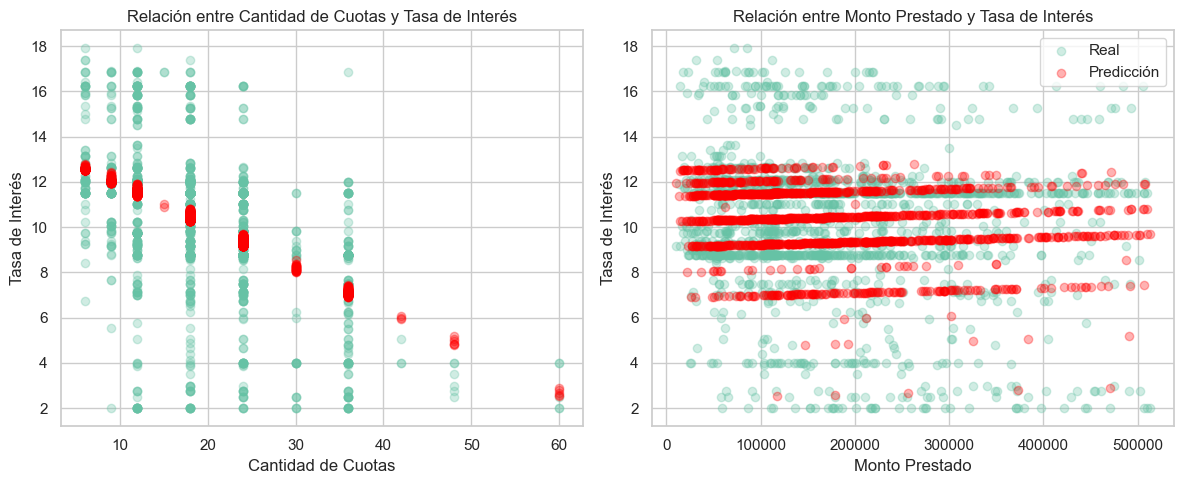

In [83]:
# Separo las características (X) y la variable objetivo (y)
X = df_encoded[['ctd_cuo', 'mto_pre']]
y = df_encoded['tas_tem']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creo y entreno un modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizo predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Visualizo la relación entre las características y la variable objetivo
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_test['ctd_cuo'], y_test, alpha=0.3, label='Real')
plt.scatter(X_test['ctd_cuo'], y_pred, color='red', alpha=0.3, label='Predicción')
plt.xlabel('Cantidad de Cuotas')
plt.ylabel('Tasa de Interés')
plt.title('Relación entre Cantidad de Cuotas y Tasa de Interés')

plt.subplot(1, 2, 2)
plt.scatter(X_test['mto_pre'], y_test, alpha=0.3, label='Real')
plt.scatter(X_test['mto_pre'], y_pred, color='red', alpha=0.3, label='Predicción')

plt.xlabel('Monto Prestado')
plt.ylabel('Tasa de Interés')
plt.title('Relación entre Monto Prestado y Tasa de Interés')

plt.tight_layout()
plt.legend()
plt.show()


In [86]:
from sklearn.model_selection import cross_val_score
model = LinearRegression()
# realize una validación cruzada de 5 divisiones
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
# Ahora reviso los promedios 
mse_mean = -scores.mean()
r2_mean = cross_val_score(model, X, y, cv=5, scoring='r2').mean()
print(f'MSE promedio: {mse_mean:.2f}')
print(f'R² promedio: {r2_mean:.2f}')


MSE promedio: 6.75
R² promedio: 0.26
